Kaggle: https://www.kaggle.com/c/titanic/overview

👋🛳️ Ahoy, welcome to Kaggle! You’re in the right place.
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Read on or watch the video below to explore more details. Once you’re ready to start competing, click on the "Join Competition button to create an account and gain access to the competition data. Then check out Alexis Cook’s Titanic Tutorial that walks you through step by step how to make your first submission!



The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
#From: https://pypi.org/project/info-gain/
from collections import Counter
from scipy.stats import entropy
import math

def _Ex_a_v_(Ex, a, v, nan=True):
    """ Compute the Ex_a_v value given whether nan==nan or nan!=nan.
    
        Parameters
        ----------
        Ex : list of hashable
            A list of hashable objects (examples)
            corresponding to the given attributes a.
            I.e. a[i] <--> Ex[i].

        a : list of hashable
            A list of hashable objects (attributes)
            corresponding to the given examples Ex.
            I.e. a[i] <--> Ex[i].
            
        v : hashable object
            The hashable object for which to compute
            the Ex_a_v value.
            
        nan : boolean, default=True
            Boolean indicating how nan==nan should be evaluated.
            Default == True to avoid division by 0 errors.
            
        Returns
        -------
        result : list of hashable.
            List of Ex where value(a) == v.
            
        """
    if nan:
        return [x for x, t in zip(Ex, a) if (isinstance(t, float) and
                                             isinstance(v, float) and
                                             math.isnan(t)        and
                                             math.isnan(v))       or
                                             (t == v)]
    else:
        return [x for x, t in zip(Ex, a) if t == v]


def info_gain(Ex, a, nan=True):
    """ Compute the information gain of an attribute a for given examples.

        Parameters
        ----------
        Ex : list of hashable
            A list of hashable objects (examples)
            corresponding to the given attributes a.
            I.e. a[i] <--> Ex[i].

        a : list of hashable
            A list of hashable objects (attributes)
            corresponding to the given examples Ex.
            I.e. a[i] <--> Ex[i].
            
        nan : boolean, default=True
            Boolean indicating how nan==nan should be evaluated.
            Default == True to avoid division by 0 errors.

        Returns
        -------
        result : float
            Information gain by knowing given attributes.

        """
    # Check whether examples and attributes have the same lengths.
    if len(Ex) != len(a):
        raise ValueError("Ex and a must be of the same size.")

    # Compute the entropy of examples
    H_Ex = entropy(list(Counter(Ex).values()))

    # Compute the sum of all values v in a
    sum_v = 0
    for v in set(a):
        Ex_a_v = _Ex_a_v_(Ex, a, v, nan)
        sum_v += (len(Ex_a_v) / len(Ex)) *\
                 (entropy(list(Counter(Ex_a_v).values())))

    # Return result
    return H_Ex - sum_v


def intrinsic_value(Ex, a, nan=True):
    """ Compute the intrinsic value of an attribute a for given examples.

        Parameters
        ----------
        Ex : list of hashable
            A list of hashable objects (examples)
            corresponding to the given attributes a.
            I.e. a[i] <--> Ex[i].

        a : list of hashable
            A list of hashable objects (attributes)
            corresponding to the given examples Ex.
            I.e. a[i] <--> Ex[i].
            
        nan : boolean, default=True
            Boolean indicating how nan==nan should be evaluated.
            Default == True to avoid division by 0 errors.

        Returns
        -------
        result : float
            Intrinsic value of attribute a for samples Ex.

        """
    # Check whether examples and attributes have the same lengths.
    if len(Ex) != len(a):
        raise ValueError("Ex and a must be of the same size.")

    # Compute the sum of all values v in a
    sum_v = 0
    for v in set(a):
        Ex_a_v = _Ex_a_v_(Ex, a, v, nan)
        sum_v += (len(Ex_a_v) / len(Ex)) * math.log(len(Ex_a_v) / len(Ex), 2)

    # Return result
    return -sum_v


def info_gain_ratio(Ex, a, nan=True):
    """ Compute the information gain ratio of an attribute a for given examples.

        Parameters
        ----------
        Ex : list of hashable
            A list of hashable objects (examples)
            corresponding to the given attributes a.
            I.e. a[i] <--> Ex[i].

        a : list of hashable
            A list of hashable objects (attributes)
            corresponding to the given examples Ex.
            I.e. a[i] <--> Ex[i].
            
        nan : boolean, default=True
            Boolean indicating how nan==nan should be evaluated.
            Default == True to avoid division by 0 errors.

        Returns
        -------
        result : float
            Information gain ratio by knowing given attributes.
            I.e. information gain normalised with intrinsic value calculation.

        """
    # Check whether examples and attributes have the same lengths.
    if len(Ex) != len(a):
        raise ValueError("Ex and a must be of the same size.")

    # Compute information gain ratio as IG/IV
    return info_gain(Ex, a, nan) / intrinsic_value(Ex, a, nan)


Variables:
PassengerID - A column added by Kaggle to identify each row and make submissions easier

Survived - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)

Pclass - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)

Sex - The passenger's sex

Age - The passenger's age in years

SibSp - The number of siblings or spouses the passenger had aboard the Titanic

Parch - The number of parents or children the passenger had aboard the Titanic

Ticket - The passenger's ticket number

Fare - The fare the passenger paid

Cabin - The passenger's cabin number

Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)


Final variables:

Pclass
Title (from Name)
Age
Family (SibSp + Parch)
Embarked_C

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import minmax_scale

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width=None

In [3]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
holdout = pd.read_csv("test.csv")
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Artagaveytia, Mr. Ramon",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
#Missing values.
round(train['Survived'].sum()/len(train), 4)

0.3838

In [8]:
print(train.isnull().sum())
print()
print(train.isnull().sum() / len(train))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [9]:
#Variables with missing: Age, Cabin, Embarked
train["Age"] = train["Age"].fillna(-1.0) 

In [10]:
train['Cabin'] = train['Cabin'].fillna('Unknown')
train['Deck'] = train['Cabin'].str.get(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,U


In [11]:
display(train[train['Embarked'].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


In [12]:
#Google says they embarked in S (https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html)
train["Embarked"] = train["Embarked"].fillna("S")

In [13]:
#Correct these variables in holdout
holdout["Age"] = holdout["Age"].fillna(-1.0) 
holdout['Cabin'] = holdout['Cabin'].fillna('Unknown')
holdout['Deck'] = holdout['Cabin'].str.get(0)
holdout["Embarked"] = holdout["Embarked"].fillna("S")

In [14]:
#Variable Name 
#They all performance the same. Therefore,  process_Titles_2 is better because it is simplier)
def process_Titles_1(df):
    """Extract and categorize the title from the name column. 

    Usage
    ------

    train = process_Titles_1(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title_1"] = extracted_titles.map(titles)
    return df


def process_Titles_2(df):
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs_Miss",
        "Ms":          "Mrs_Miss",
        "Mrs" :        "Mrs_Miss",
        "Master" :     "Master_Royalty",
        "Mlle":        "Mrs_Miss",
        "Miss" :       "Mrs_Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Master_Royalty",
        "Don":         "Master_Royalty",
        "Sir" :        "Master_Royalty",
        "Countess":    "Master_Royalty",
        "Dona":        "Master_Royalty",
        "Lady" :       "Master_Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title_2"] = extracted_titles.map(titles)
    return df

In [15]:
def graf_ig(variable):
    """Plot survived and nor survived per category. 
    Caculate the information gain.

    Usage
    ------

    graf_ig(variable)
    """
    fig, axs = plt.subplots(figsize=(20, 10))
    sns.countplot(x = variable, hue = 'Survived', data = train)

    plt.xlabel(variable, size = 15, labelpad = 20)
    plt.ylabel('Passenger Count', size = 15, labelpad = 20)
    plt.tick_params(axis = 'x', labelsize = 15)
    plt.tick_params(axis = 'y', labelsize = 15)
    plt.xticks(rotation=45)

    plt.legend(['Not Survived', 'Survived'], loc = 'upper right', prop = {'size': 15})
    plt.title('Survival Counts in {} Feature'.format(variable), size = 15, y = 1.05)

    plt.show()

    age_ig = info_gain(train['Survived'], train[variable])
    print(age_ig)

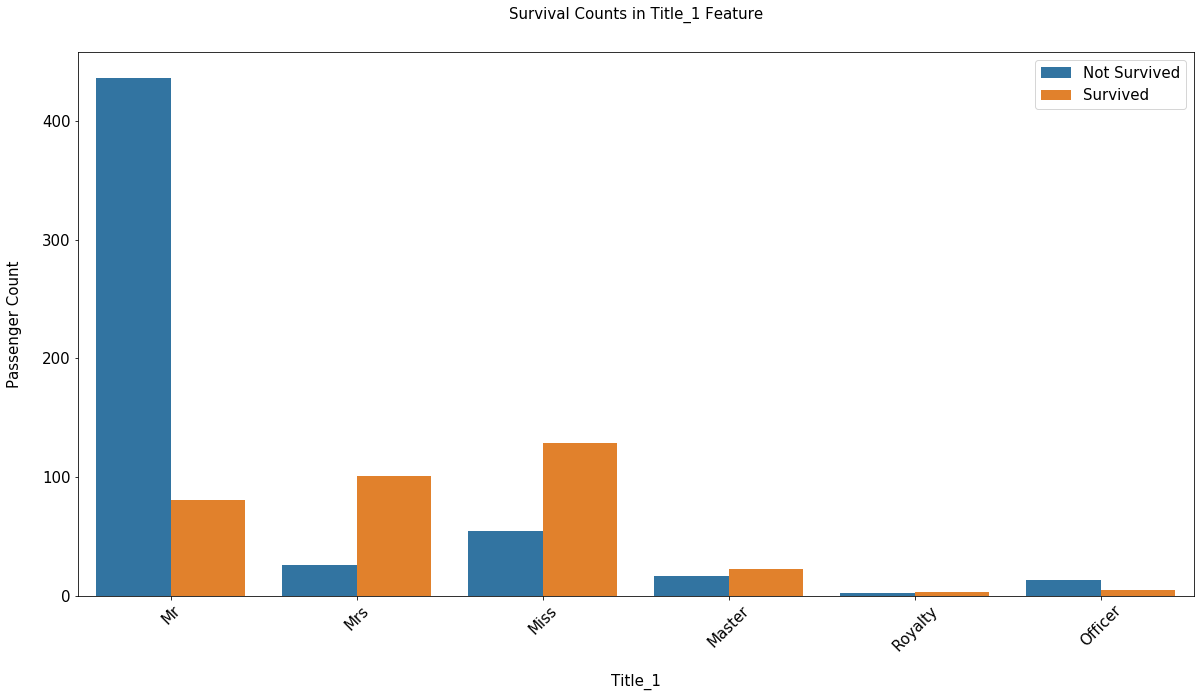

0.16948851510950763


In [16]:
train = process_Titles_1(train)
graf_ig('Title_1')

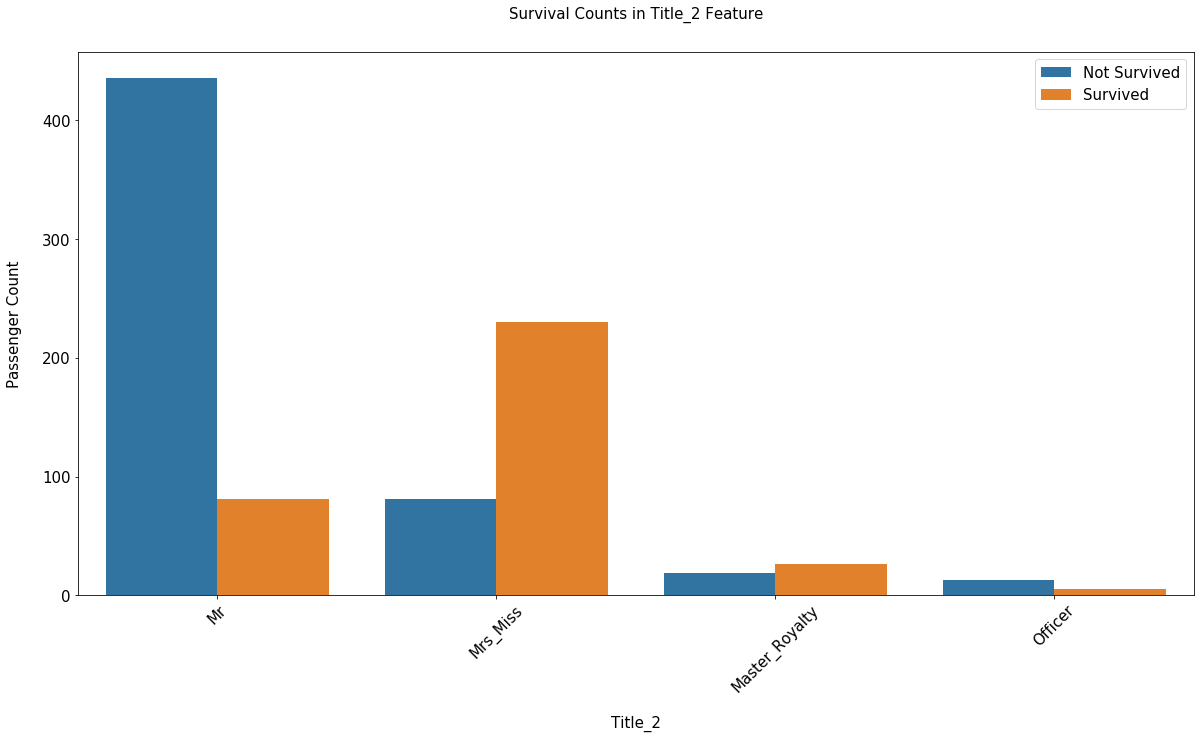

0.1675024769172762


In [17]:
train = process_Titles_2(train)
graf_ig('Title_2')

In [18]:
holdout = process_Titles_2(holdout)

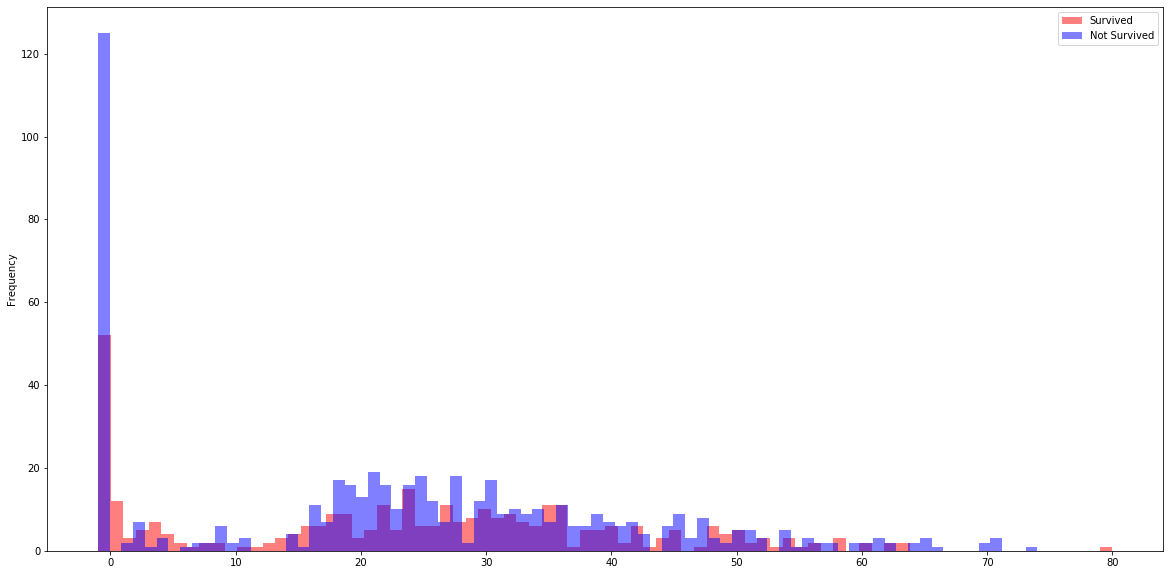

In [19]:
#Variable Age
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]

fig = plt.figure(figsize = (20, 10))
survived["Age"].plot.hist(alpha=0.5,color='red',bins=80)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=80)
plt.legend(['Survived', 'Not Survived'])
plt.show()

In [20]:
#Classifies the variable Age (Best one: process_Age_1)
def process_Age_1(df):
    """Process the Age column into pre-defined 'bins'.

    Usage
    ------

    train = process_age_1(train)
    """
    cut_points = [-2, 0, 1.1, 5, 12, 18, 35, 60, 100]
    label_names = ["Missing","A_0", "A_1", "A_2", "A_3", "A_4", "A_5", "A_6"]
    df["Age_categories_1"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df


def process_Age_2(df):
    cut_points = [-2, 0, 1.1, 5, 18, 60, 100]
    label_names = ["Missing", "A_0", "A_1", "A_2", "A_3", "A_4"]
    df["Age_categories_2"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

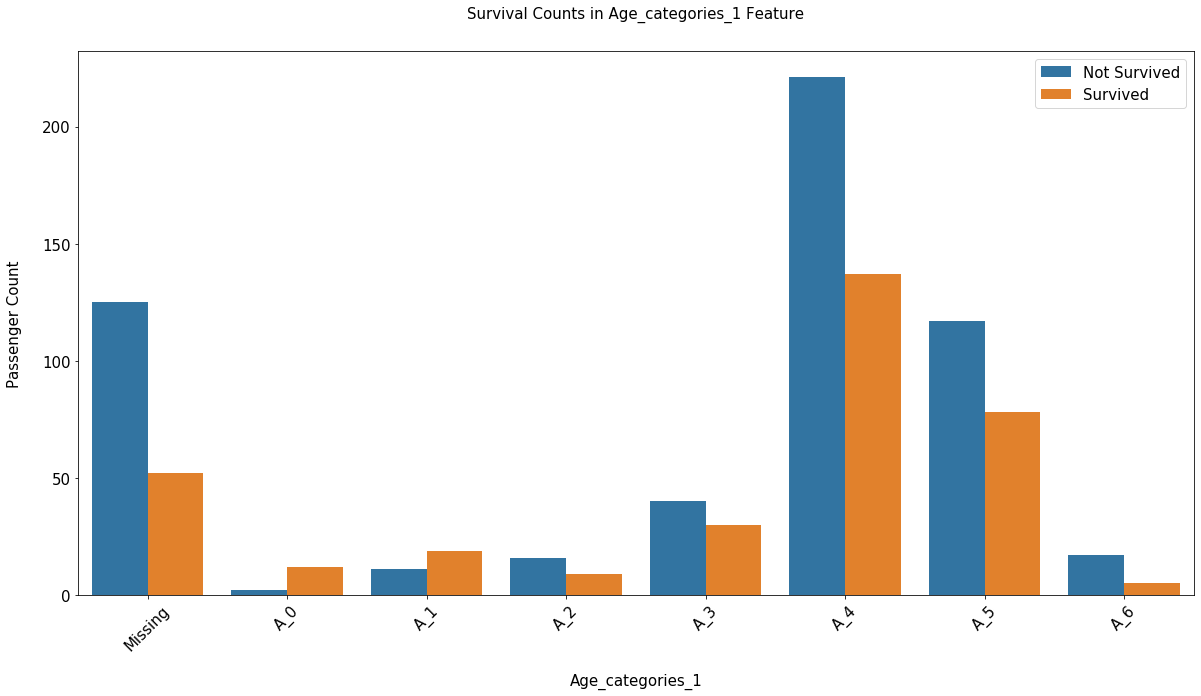

0.01720506721530002


In [21]:
train = process_Age_1(train)
graf_ig('Age_categories_1')

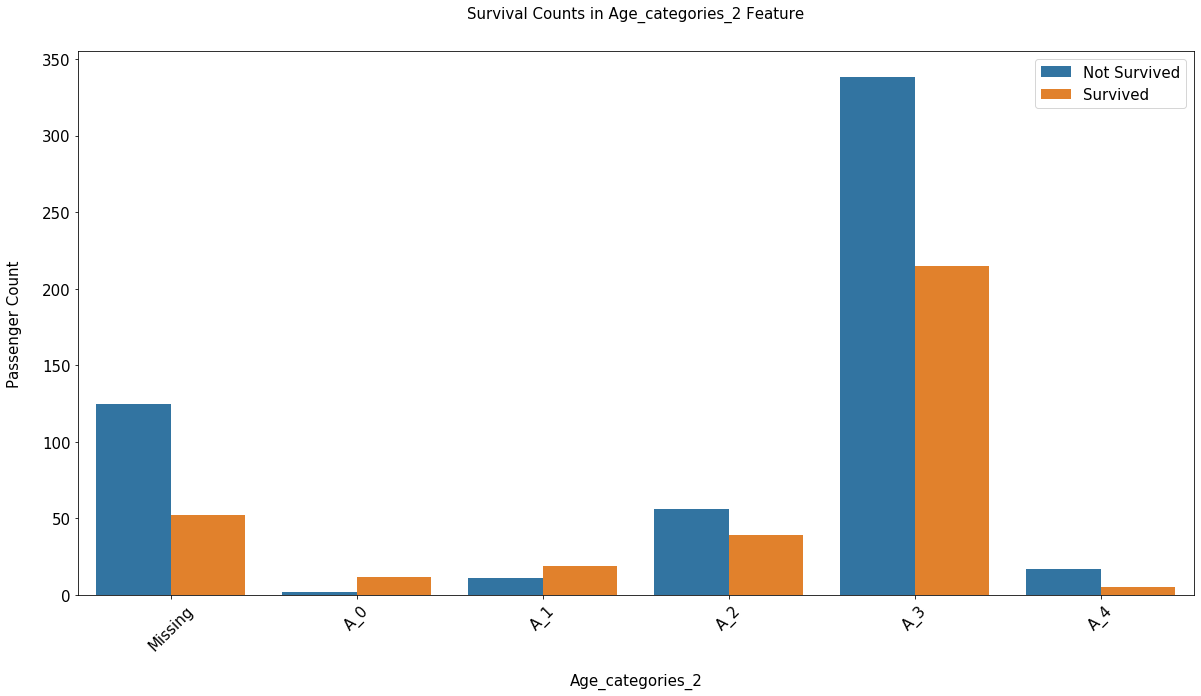

0.016913002771175245


In [22]:
train = process_Age_2(train)
graf_ig('Age_categories_2')

In [23]:
holdout = process_Age_1(holdout)

In [24]:
#Varibles: SibSp and Parch
train['SibSp'].value_counts().sort_index()

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [25]:
train['Parch'].value_counts().sort_index()    

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

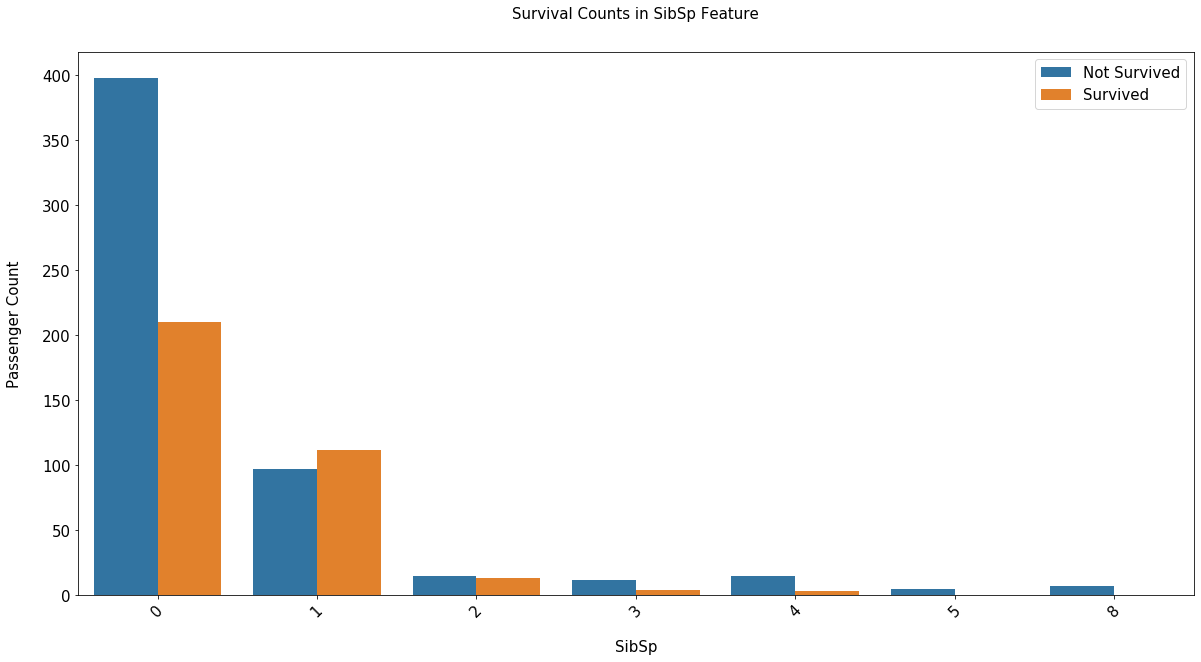

0.02319708627963979


In [26]:
graf_ig('SibSp')

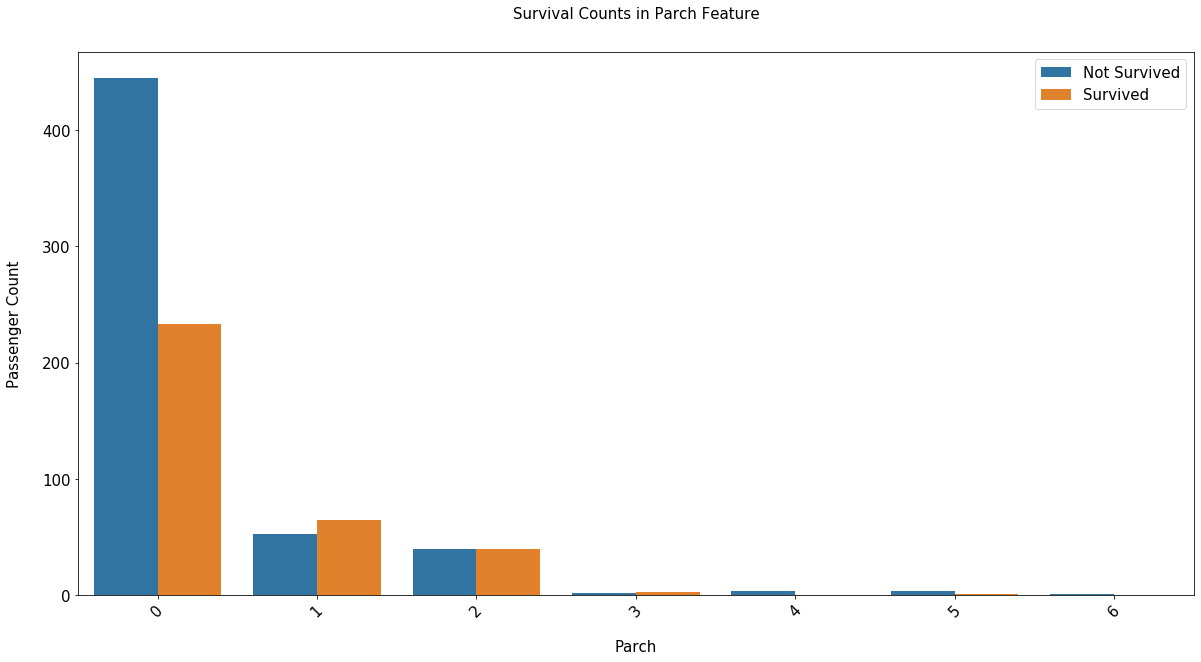

0.016365584523616472


In [27]:
graf_ig('Parch')

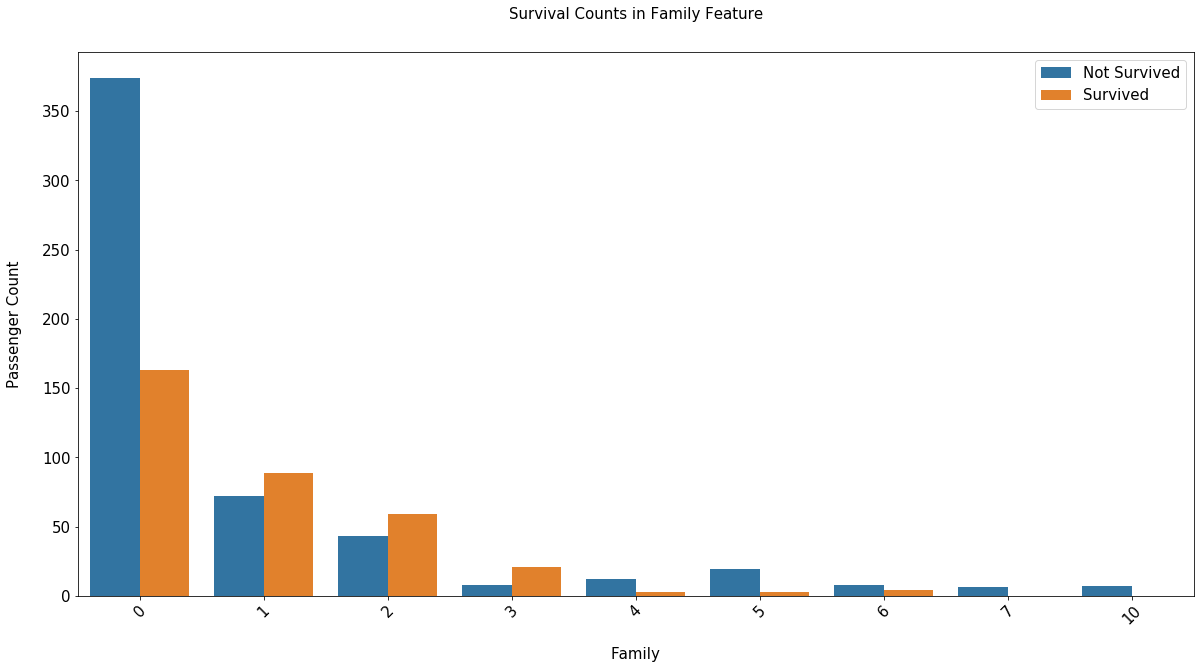

0.047781241446019695


In [28]:
train['Family'] = train[["SibSp","Parch"]].sum(axis=1)
graf_ig('Family')

In [29]:
holdout['Family'] = holdout[["SibSp","Parch"]].sum(axis=1)

In [30]:
#Classifies the variable Family (Best one: process_Family_2)
def process_Family(df):
    """Process the Family column into pre-defined 'bins'.

    Usage
    ------

    train = process_age_1(train)
    """
    cut_points = [-1, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 100]
    label_names = ["F_0", "F_1", "F_2", "F_3", "F_4", "F_5", "F_6", "F_7+"]
    df["Family_categories"] = pd.cut(df["Family"],cut_points,labels=label_names)
    return df


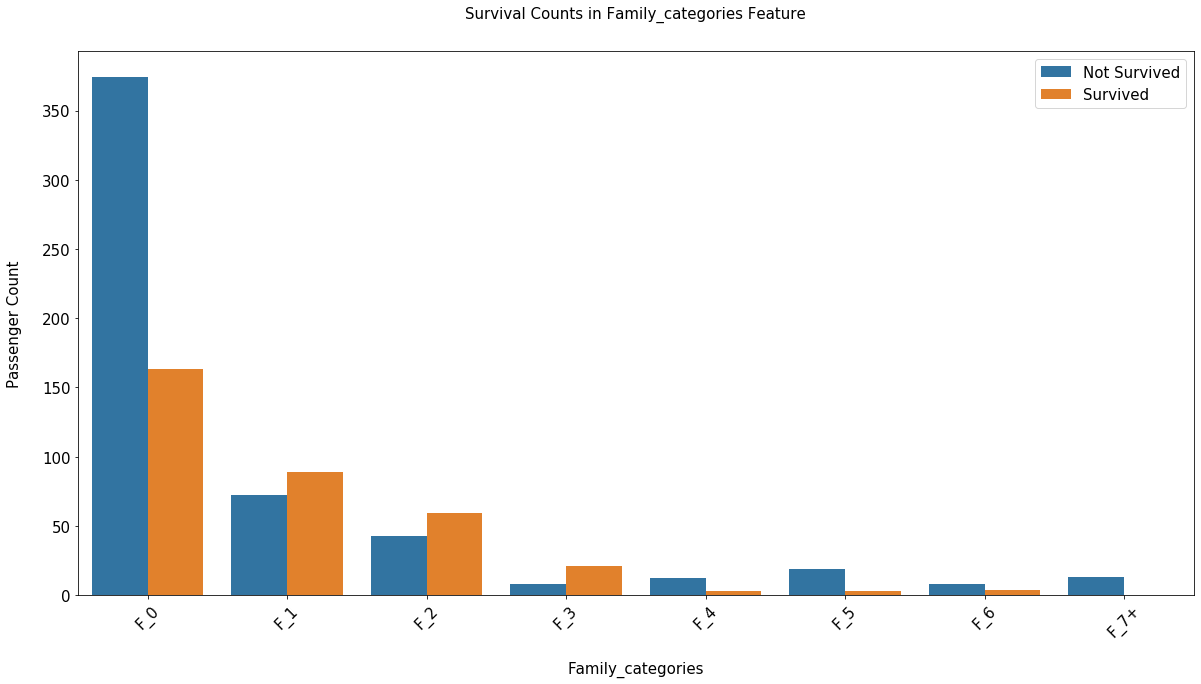

0.047781241446019695


In [31]:
train = process_Family(train)
graf_ig('Family_categories')

In [32]:
holdout = process_Family(holdout)

In [33]:
#Classifies the variable Fare (Best one: process_Fare_1)
def process_Fare_1(df):
    """Process the Age column into pre-defined 'bins'.

    Usage
    ------

    train = process_Fare_1(train)
    """
    cut_points = [0,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories_1"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_Fare_2(df):
    cut_points = [0,12,50,1000]
    label_names = ["0-12","12-50","50+"]
    df["Fare_categories_2"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

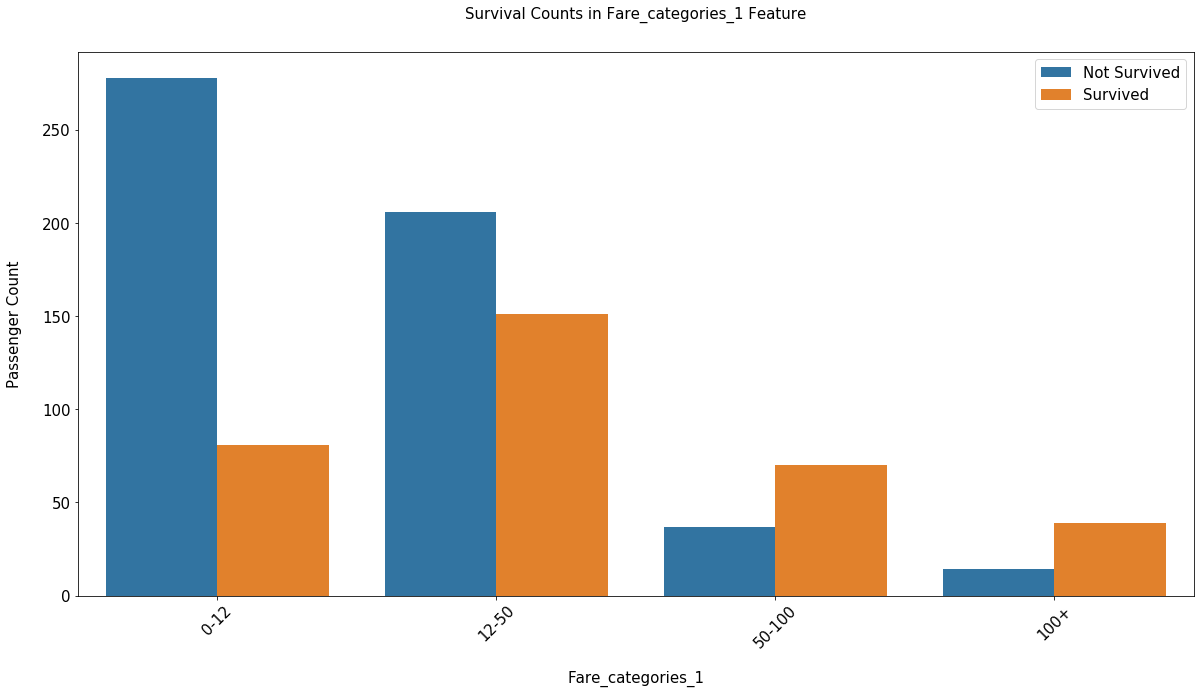

0.06192613190937346


In [34]:
train = process_Fare_1(train)
graf_ig('Fare_categories_1')

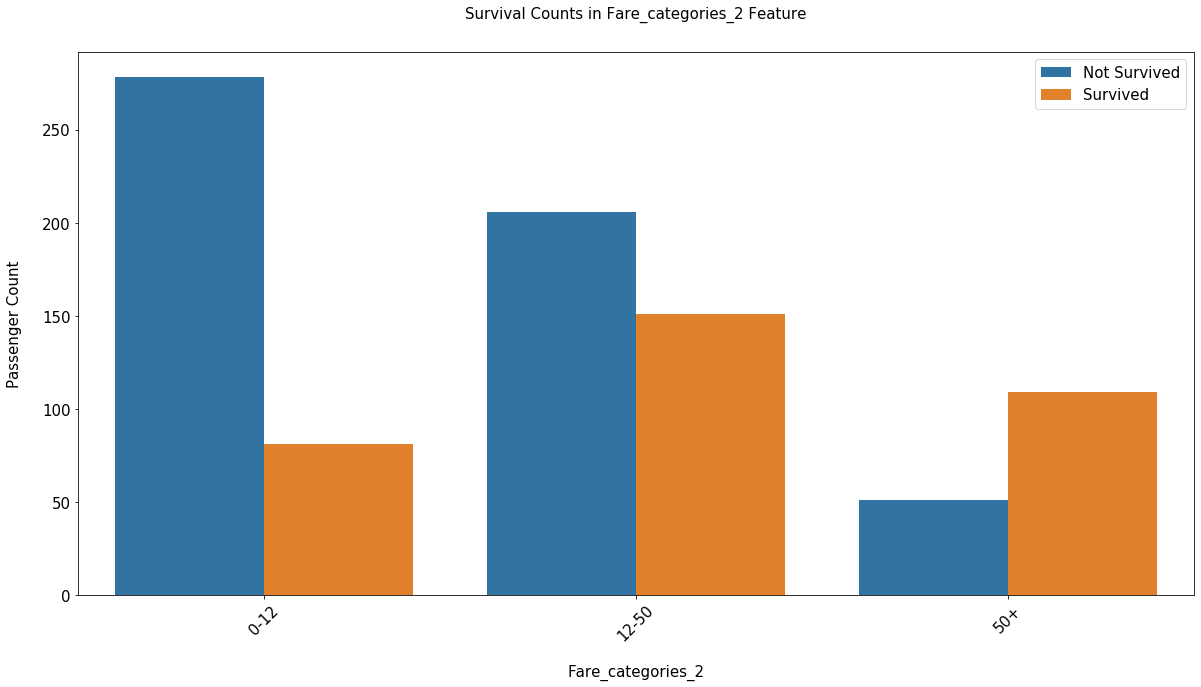

0.06130439922164077


In [35]:
train = process_Fare_2(train)
graf_ig('Fare_categories_2')

In [36]:
holdout = process_Fare_1(holdout)

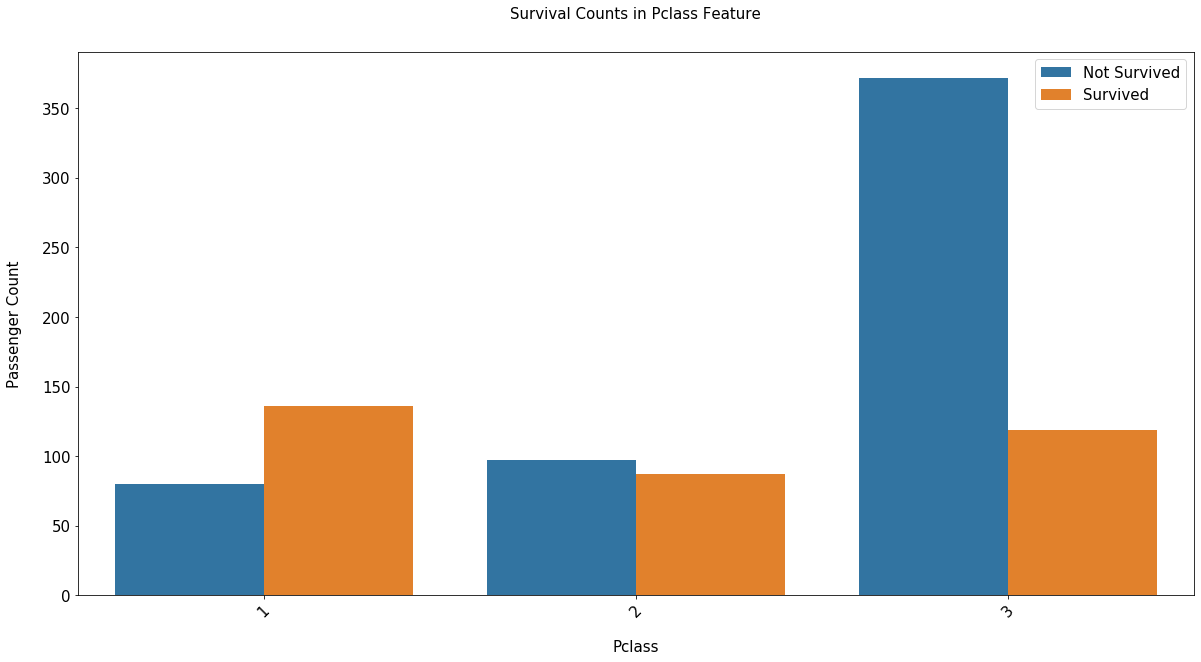

0.058107252690323574


In [37]:
#Calculates information gain.
graf_ig('Pclass')

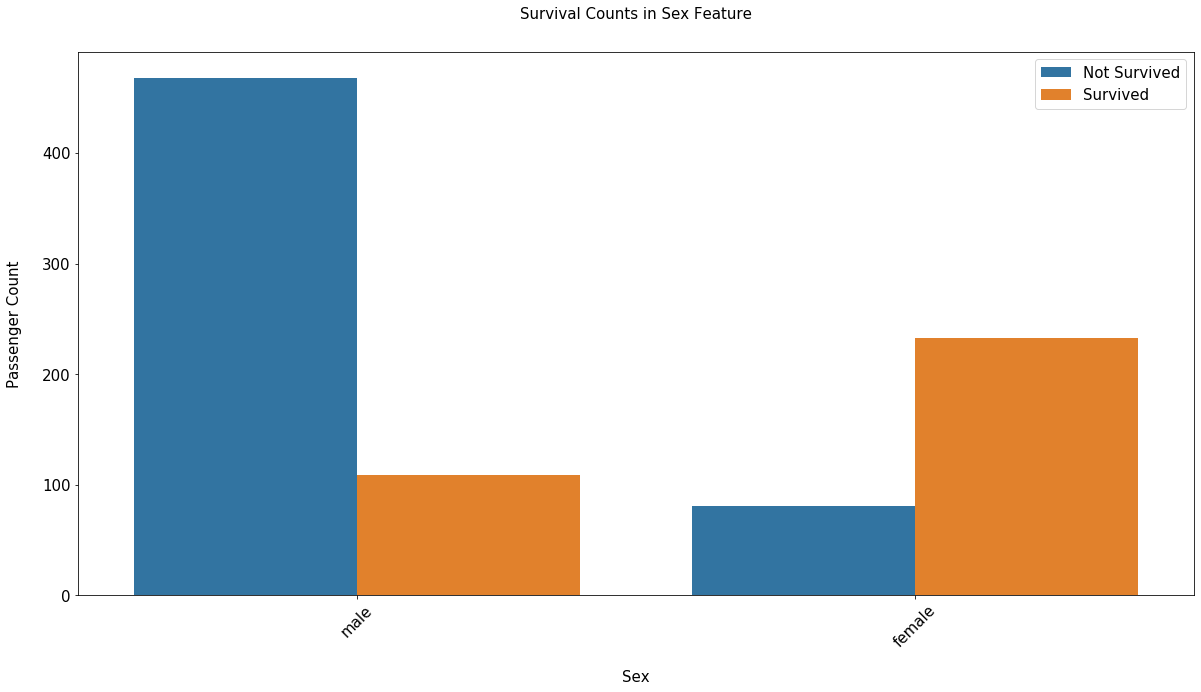

0.15087048925218172


In [38]:
graf_ig('Sex')

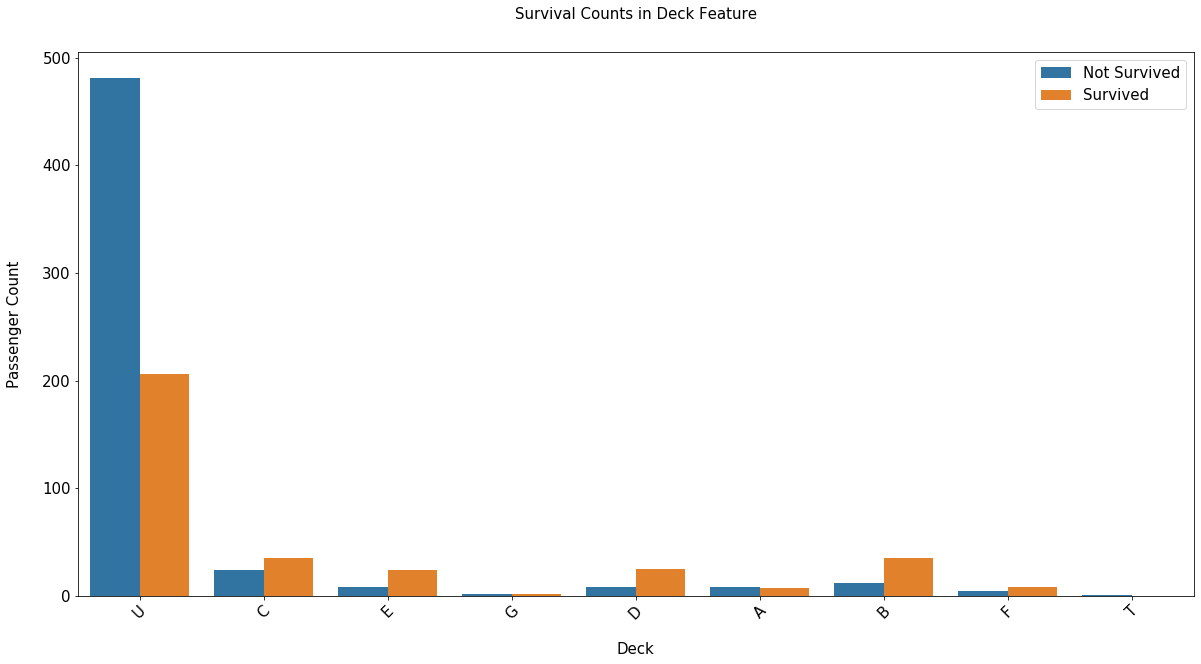

0.05512159662400029


In [39]:
graf_ig('Deck')

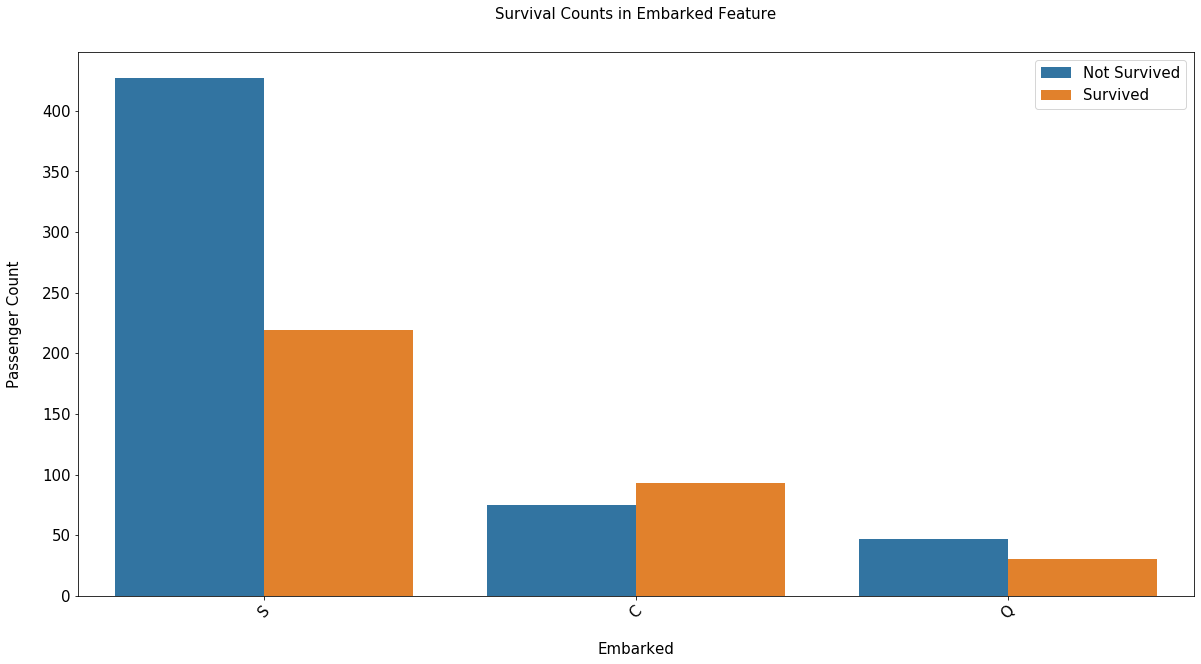

0.014233249756964939


In [40]:
graf_ig('Embarked')

Pclass         891 non-null int64    - ig Pclass = 0.058107252690323574

Name           891 non-null object   - ig Title_2 = 0.16750247691727627

Sex            891 non-null object   - ig Sex = 0.15087048925218172
                                                                   
Age            714 non-null float64  - ig Age_categories_2 = 0.016913002771175245
                                                                   
SibSp          891 non-null int64    - ig Family_categories = 0.047781241446019695

Parch          891 non-null int64    - ig Family_categories = 0.047781241446019695

Ticket         891 non-null object   - I will not use it

Fare           891 non-null float64  - ig Fare_categories_1 = 0.06192613190937346   

Cabin          204 non-null object   - ig Deck = 0.05512159662400029

Embarked       889 non-null object   - ig Embarked = 0.014233249756964939

In [41]:
#Makes new variables.
def group_variables(db, columns):
    for i1 in range(len(columns)):
        for i2 in range(len(columns) - i1 - 1):
            db[columns[i1] + "_" + columns[i2 + i1 + 1]] = db[columns[i1]].astype(str).str.cat(db[columns[i2 + i1 + 1]].astype(str), sep =" - ")
            
    
columns = ['Pclass', 'Title_2', 'Sex', 'Age_categories_1', 'Family_categories', 'Fare_categories_1', 'Deck', 'Embarked']
group_variables(train, columns)
group_variables(holdout, columns)

In [42]:
def calc_ig_var_group(db, columns):
    for i1 in range(len(columns)):
        for i2 in range(len(columns) - i1 - 1):           
            age_ig1 = info_gain(db['Survived'], db[columns[i1] + "_" + columns[i2 + i1 + 1]])
            age_ig2 = info_gain(db['Survived'], db[columns[i1]])
            age_ig3 = info_gain(db['Survived'], db[columns[i2 + i1 + 1]])
            print(columns[i1] + "_" + columns[i2 + i1 + 1] + ": " + str(age_ig1) 
                  + "    sum igs: " + str(age_ig2 + age_ig3) 
                  + "    Diference: " + str(age_ig1 - (age_ig2 + age_ig3)))
            
        print()
        print()

In [43]:
'''
Pclass_Title_2: 0.24762732379191293    sum igs: 0.22560972960759978    Diference: 0.02201759418431315
ig Sex = 0.15087048925218172
Age_categories_1_Deck: 0.09700152471646362    sum igs:0.07232666383930031     Diference: 0.07232666383930031    
ig Family_categories = 0.04669150215413487
ig Fare_categories_1 = 0.06192613190937346  
ig Embarked = 0.014233249756964939
'''
calc_ig_var_group(train, columns)

Pclass_Title_2: 0.24762732379191293    sum igs: 0.22560972960759978    Diference: 0.02201759418431315
Pclass_Sex: 0.21804614954839763    sum igs: 0.2089777419425053    Diference: 0.009068407605892337
Pclass_Age_categories_1: 0.10280148211907703    sum igs: 0.07531231990562359    Diference: 0.027489162213453433
Pclass_Family_categories: 0.10029913467125295    sum igs: 0.10588849413634327    Diference: -0.0055893594650903156
Pclass_Fare_categories_1: 0.08157147598231673    sum igs: 0.12003338459969704    Diference: -0.0384619086173803
Pclass_Deck: 0.0764790201554918    sum igs: 0.11322884931432387    Diference: -0.03674982915883207
Pclass_Embarked: 0.07002202988316053    sum igs: 0.07234050244728851    Diference: -0.0023184725641279824


Title_2_Sex: 0.17029825882537697    sum igs: 0.3183729661694579    Diference: -0.14807470734408096
Title_2_Age_categories_1: 0.1830776109804333    sum igs: 0.18470754413257623    Diference: -0.0016299331521429372
Title_2_Family_categories: 0.224040857039

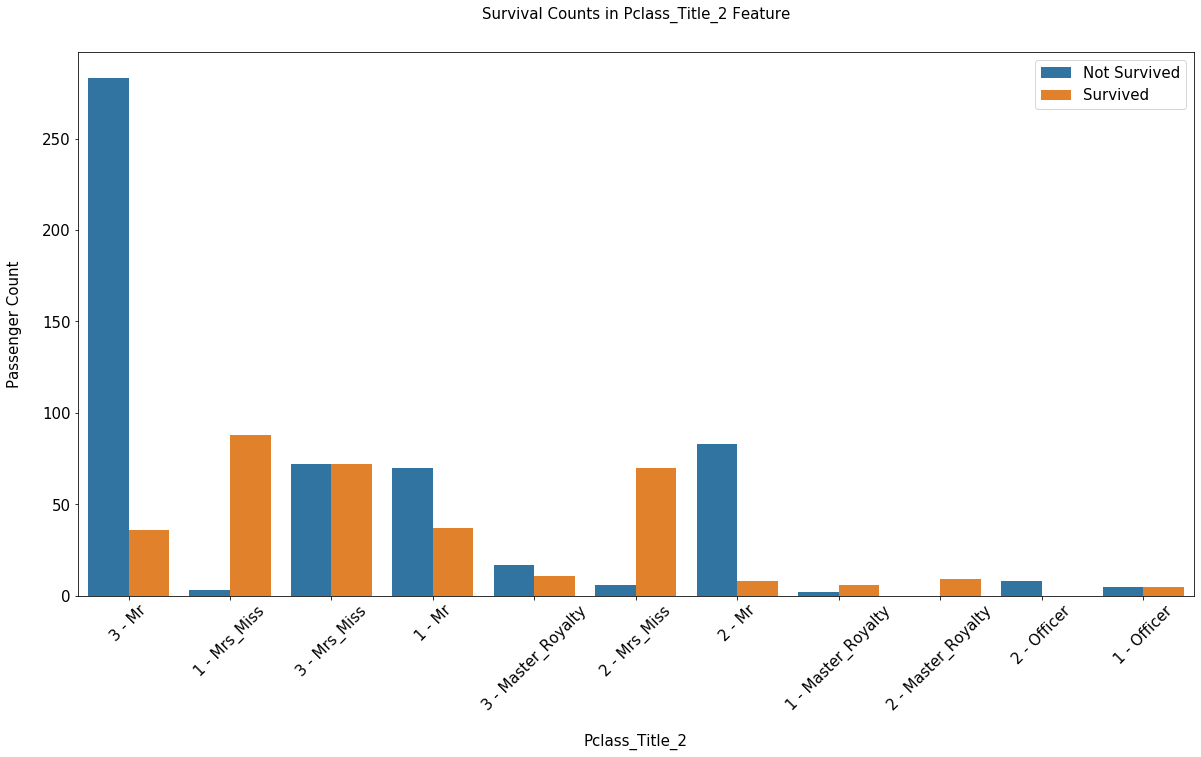

0.24762732379191293


In [44]:
graf_ig('Pclass_Title_2')

In [45]:
train['Pclass_Title_2'].value_counts()

3 - Mr                319
3 - Mrs_Miss          144
1 - Mr                107
1 - Mrs_Miss           91
2 - Mr                 91
2 - Mrs_Miss           76
3 - Master_Royalty     28
1 - Officer            10
2 - Master_Royalty      9
1 - Master_Royalty      8
2 - Officer             8
Name: Pclass_Title_2, dtype: int64

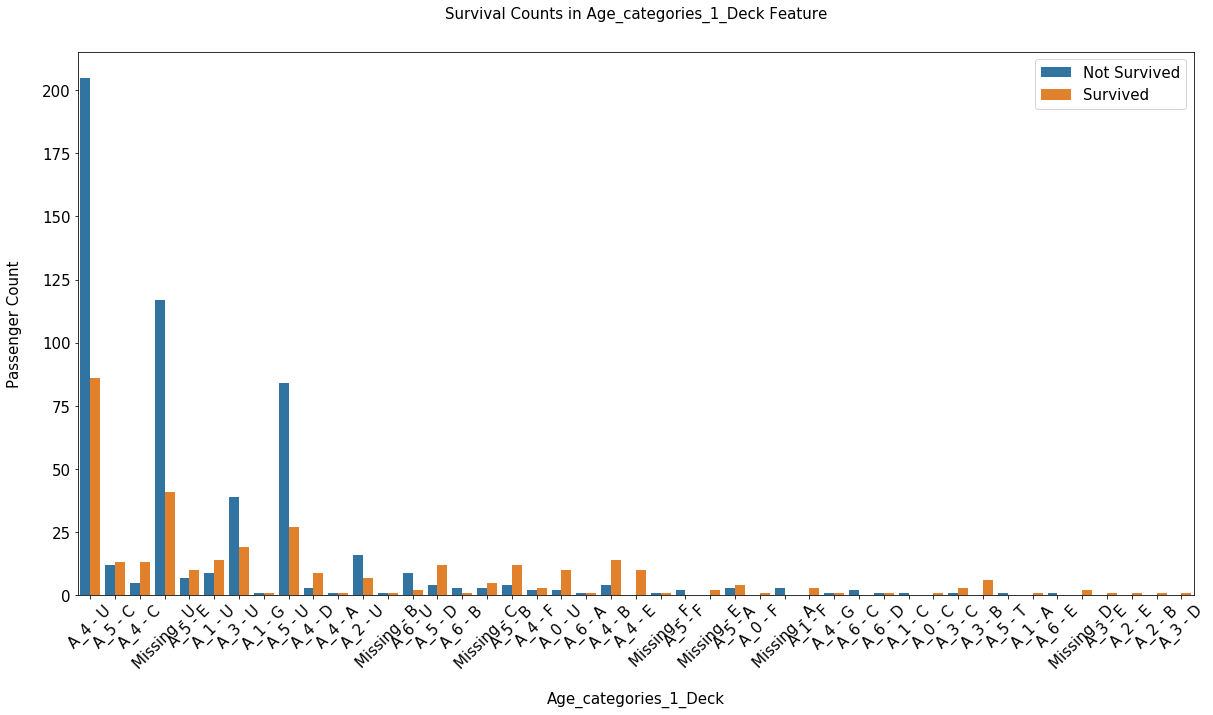

0.0970015247164635


In [46]:
graf_ig('Age_categories_1_Deck')

In [47]:
train['Age_categories_1_Deck'].value_counts()

A_4 - U        291
Missing - U    158
A_5 - U        111
A_3 - U         58
A_5 - C         25
A_2 - U         23
A_1 - U         23
A_4 - C         18
A_4 - B         18
A_5 - E         17
A_5 - D         16
A_5 - B         16
A_0 - U         12
A_4 - D         12
A_6 - U         11
A_4 - E         10
Missing - C      8
A_5 - A          7
A_3 - B          6
A_4 - F          5
A_6 - B          4
A_3 - C          4
Missing - A      3
A_1 - F          3
A_4 - G          2
A_5 - F          2
A_6 - A          2
A_6 - C          2
A_4 - A          2
Missing - F      2
Missing - E      2
A_1 - G          2
Missing - D      2
A_6 - D          2
Missing - B      2
A_3 - D          1
A_0 - C          1
A_2 - E          1
A_5 - T          1
A_2 - B          1
A_1 - C          1
A_1 - A          1
A_3 - E          1
A_0 - F          1
A_6 - E          1
Name: Age_categories_1_Deck, dtype: int64

Depite the information gain of the new variable "Age_categories_1_Deck", there will be overfit if we use it.
Furthermore, probably this increase in information gain is because of the higher number of bins. 

In [48]:
#Drops useless columns
columns_to_keep_Train = ['PassengerId', 'Survived', 'Sex', 'Pclass_Title_2', 'Age_categories_1', 'Deck'
                   , 'Family_categories', 'Fare_categories_1', 'Embarked']
train = train[columns_to_keep_Train]
train.head()

,PassengerId,Survived,Sex,Pclass_Title_2,Age_categories_1,Deck,Family_categories,Fare_categories_1,Embarked
0,1,0,male,3 - Mr,A_4,U,F_1,0-12,S
1,2,1,female,1 - Mrs_Miss,A_5,C,F_1,50-100,C
2,3,1,female,3 - Mrs_Miss,A_4,U,F_0,0-12,S
3,4,1,female,1 - Mrs_Miss,A_4,C,F_1,50-100,S
4,5,0,male,3 - Mr,A_4,U,F_0,0-12,S


In [49]:
columns_to_keep_Holdout = ['PassengerId', 'Sex', 'Pclass_Title_2', 'Age_categories_1', 'Deck'
                   , 'Family_categories', 'Fare_categories_1', 'Embarked']
holdout = holdout[columns_to_keep_Holdout]
holdout.head()

,PassengerId,Sex,Pclass_Title_2,Age_categories_1,Deck,Family_categories,Fare_categories_1,Embarked
0,892,male,3 - Mr,A_4,U,F_0,0-12,Q
1,893,female,3 - Mrs_Miss,A_5,U,F_1,0-12,S
2,894,male,2 - Mr,A_6,U,F_0,0-12,Q
3,895,male,3 - Mr,A_4,U,F_0,0-12,S
4,896,female,3 - Mrs_Miss,A_4,U,F_2,12-50,S


In [50]:
#Creates dummies
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    df = pd.concat([df, dummies], axis = 1)
    return df

columns = ['Sex', 'Pclass_Title_2', 'Age_categories_1', 'Deck'
                   , 'Family_categories', 'Fare_categories_1', 'Embarked']

for col in columns:
    train = create_dummies(train, col)

for col in columns:
    holdout = create_dummies(holdout, col)

In [51]:
#Verify correlation.
corrmat = train.corr()
sorted_corrs = corrmat['Survived'].abs().sort_values(ascending = False)
display(sorted_corrs)

Survived                             1.000000
Sex_female                           0.543351
Sex_male                             0.543351
Pclass_Title_2_3 - Mr                0.416123
Pclass_Title_2_1 - Mrs_Miss          0.404453
Pclass_Title_2_2 - Mrs_Miss          0.337329
Deck_U                               0.316912
Fare_categories_1_0-12               0.267244
Fare_categories_1_50-100             0.205384
Pclass_Title_2_2 - Mr                0.205229
Family_categories_F_0                0.203367
Fare_categories_1_100+               0.182033
Deck_B                               0.175095
Embarked_C                           0.168240
Family_categories_F_1                0.163157
Deck_D                               0.150716
Embarked_S                           0.149683
Deck_E                               0.145321
Family_categories_F_2                0.143869
Family_categories_F_3                0.128347
Pclass_Title_2_2 - Master_Royalty    0.127985
Age_categories_1_A_0              

In [52]:
#Choose at least one bin from each variable to discard.
def bin_discart(column, size_y = 25, size_x = 20):
    """Print bins of variable.
    Calculates the correlation of each bin with the target variable;
    Plots the heatmap.
    Saves the heatmap.

    Usage
    ------

    bin_discart(column, size_y, size_x)
    """
    cols = [col for col in train.columns if column in col]
    cols.append('Survived')
    print(*cols, sep = '\n')

    corrmat = train[cols].corr()
    sorted_corrs = corrmat['Survived'].abs().sort_values(ascending = False)
    display(sorted_corrs)

    corrmat = train[cols].corr()

    plt.figure(figsize = (size_x, size_y))
    sns.set(font_scale = 1.5)
    
    ax = sns.heatmap(corrmat, annot = True, linewidth = 0.5, cmap='coolwarm')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    plt.tight_layout()
    plt.savefig('Bin_' + column + '.png')
    plt.show()
    

Pclass_Title_2
Pclass_Title_2_1 - Master_Royalty
Pclass_Title_2_1 - Mr
Pclass_Title_2_1 - Mrs_Miss
Pclass_Title_2_1 - Officer
Pclass_Title_2_2 - Master_Royalty
Pclass_Title_2_2 - Mr
Pclass_Title_2_2 - Mrs_Miss
Pclass_Title_2_2 - Officer
Pclass_Title_2_3 - Master_Royalty
Pclass_Title_2_3 - Mr
Pclass_Title_2_3 - Mrs_Miss
Survived


Survived                             1.000000
Pclass_Title_2_3 - Mr                0.416123
Pclass_Title_2_1 - Mrs_Miss          0.404453
Pclass_Title_2_2 - Mrs_Miss          0.337329
Pclass_Title_2_2 - Mr                0.205229
Pclass_Title_2_2 - Master_Royalty    0.127985
Pclass_Title_2_3 - Mrs_Miss          0.104873
Pclass_Title_2_2 - Officer           0.075126
Pclass_Title_2_1 - Master_Royalty    0.071666
Pclass_Title_2_1 - Mr                0.028900
Pclass_Title_2_1 - Officer           0.025448
Pclass_Title_2_3 - Master_Royalty    0.003340
Name: Survived, dtype: float64

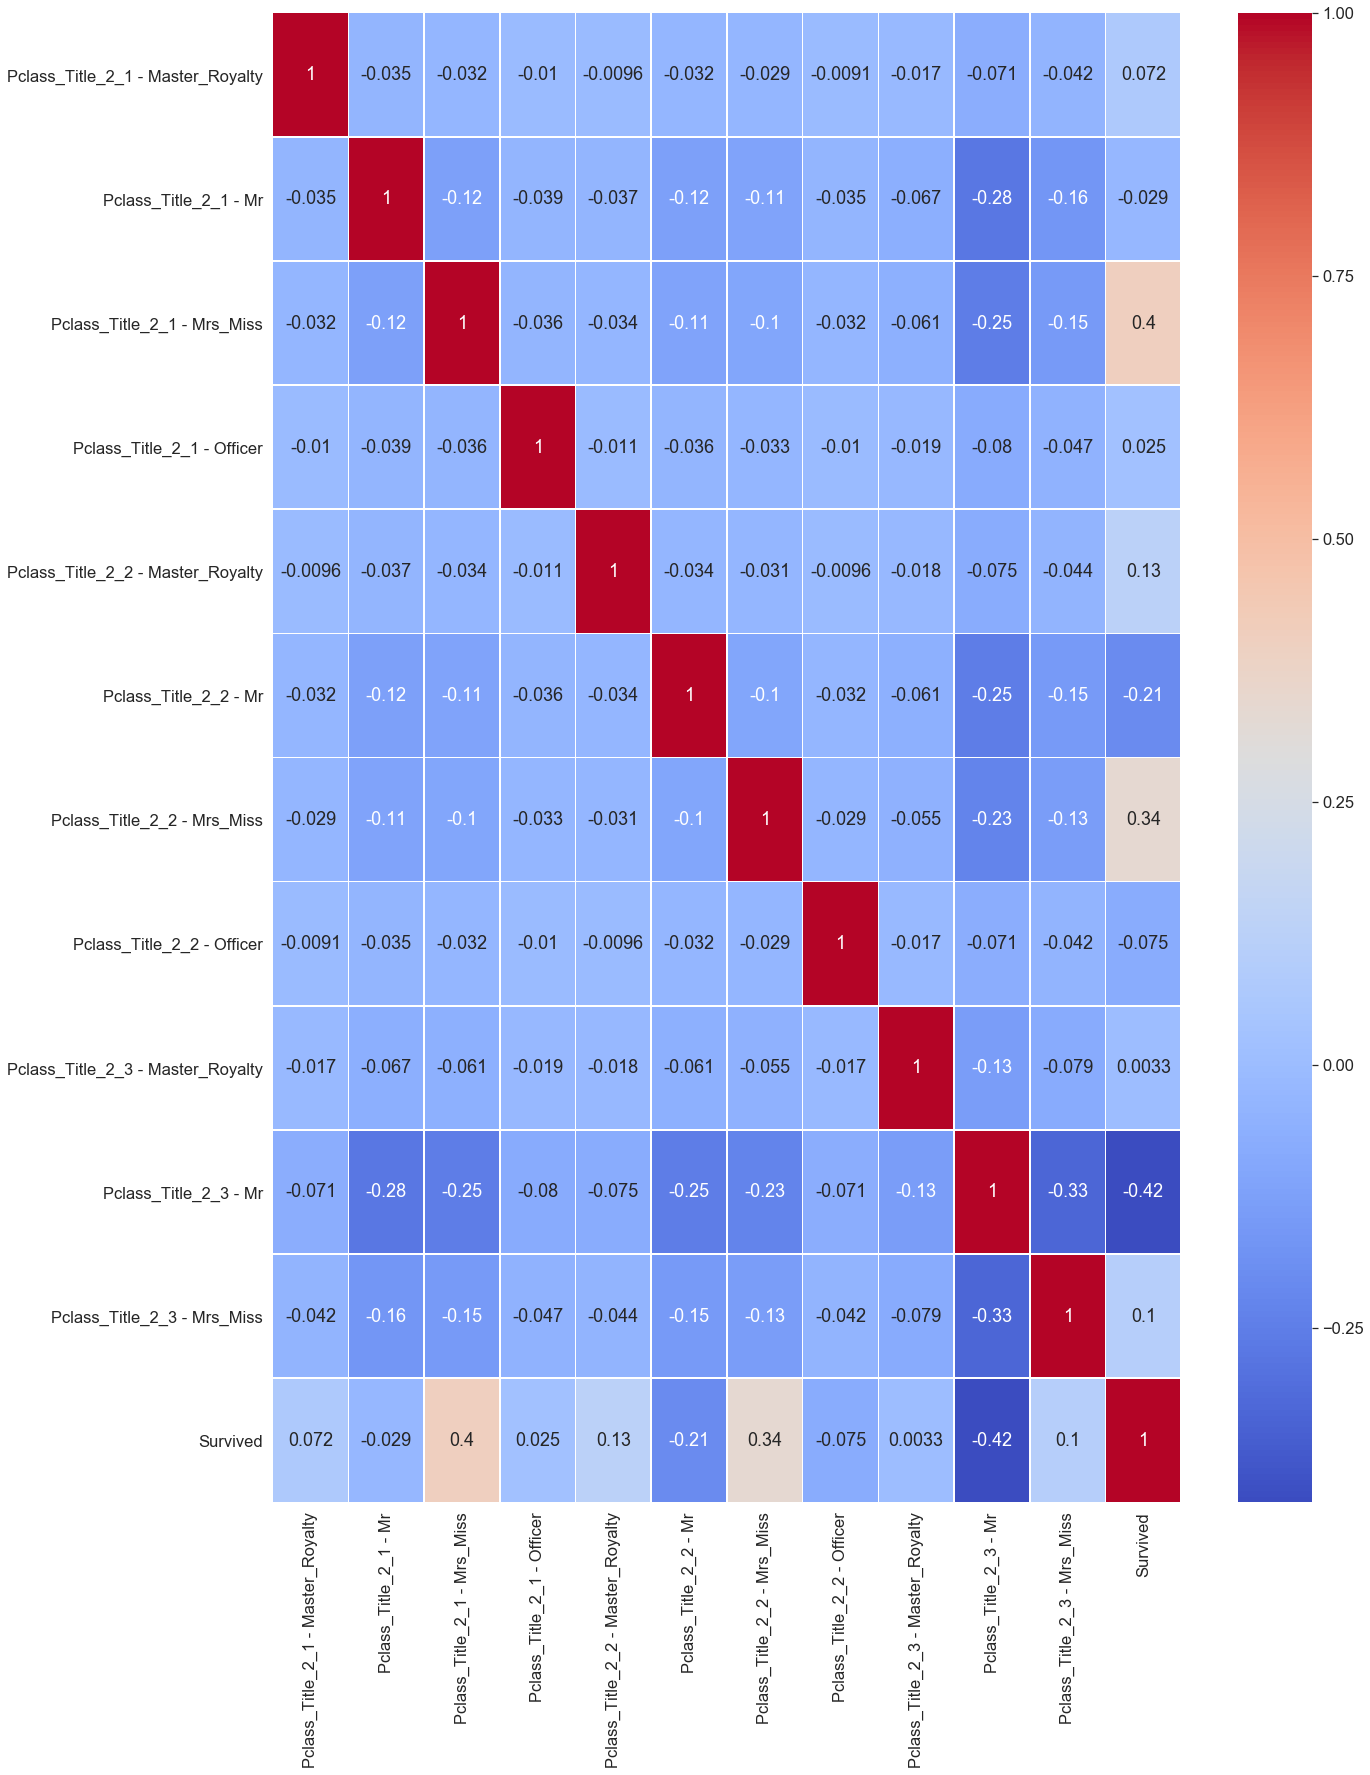

In [53]:
bin_discart('Pclass')

Age_categories_1
Age_categories_1_Missing
Age_categories_1_A_0
Age_categories_1_A_1
Age_categories_1_A_2
Age_categories_1_A_3
Age_categories_1_A_4
Age_categories_1_A_5
Age_categories_1_A_6
Survived


Survived                    1.000000
Age_categories_1_A_0        0.122966
Age_categories_1_A_1        0.095763
Age_categories_1_Missing    0.092197
Age_categories_1_A_6        0.051224
Age_categories_1_A_3        0.026859
Age_categories_1_A_5        0.017590
Age_categories_1_A_2        0.008328
Age_categories_1_A_4        0.001949
Name: Survived, dtype: float64

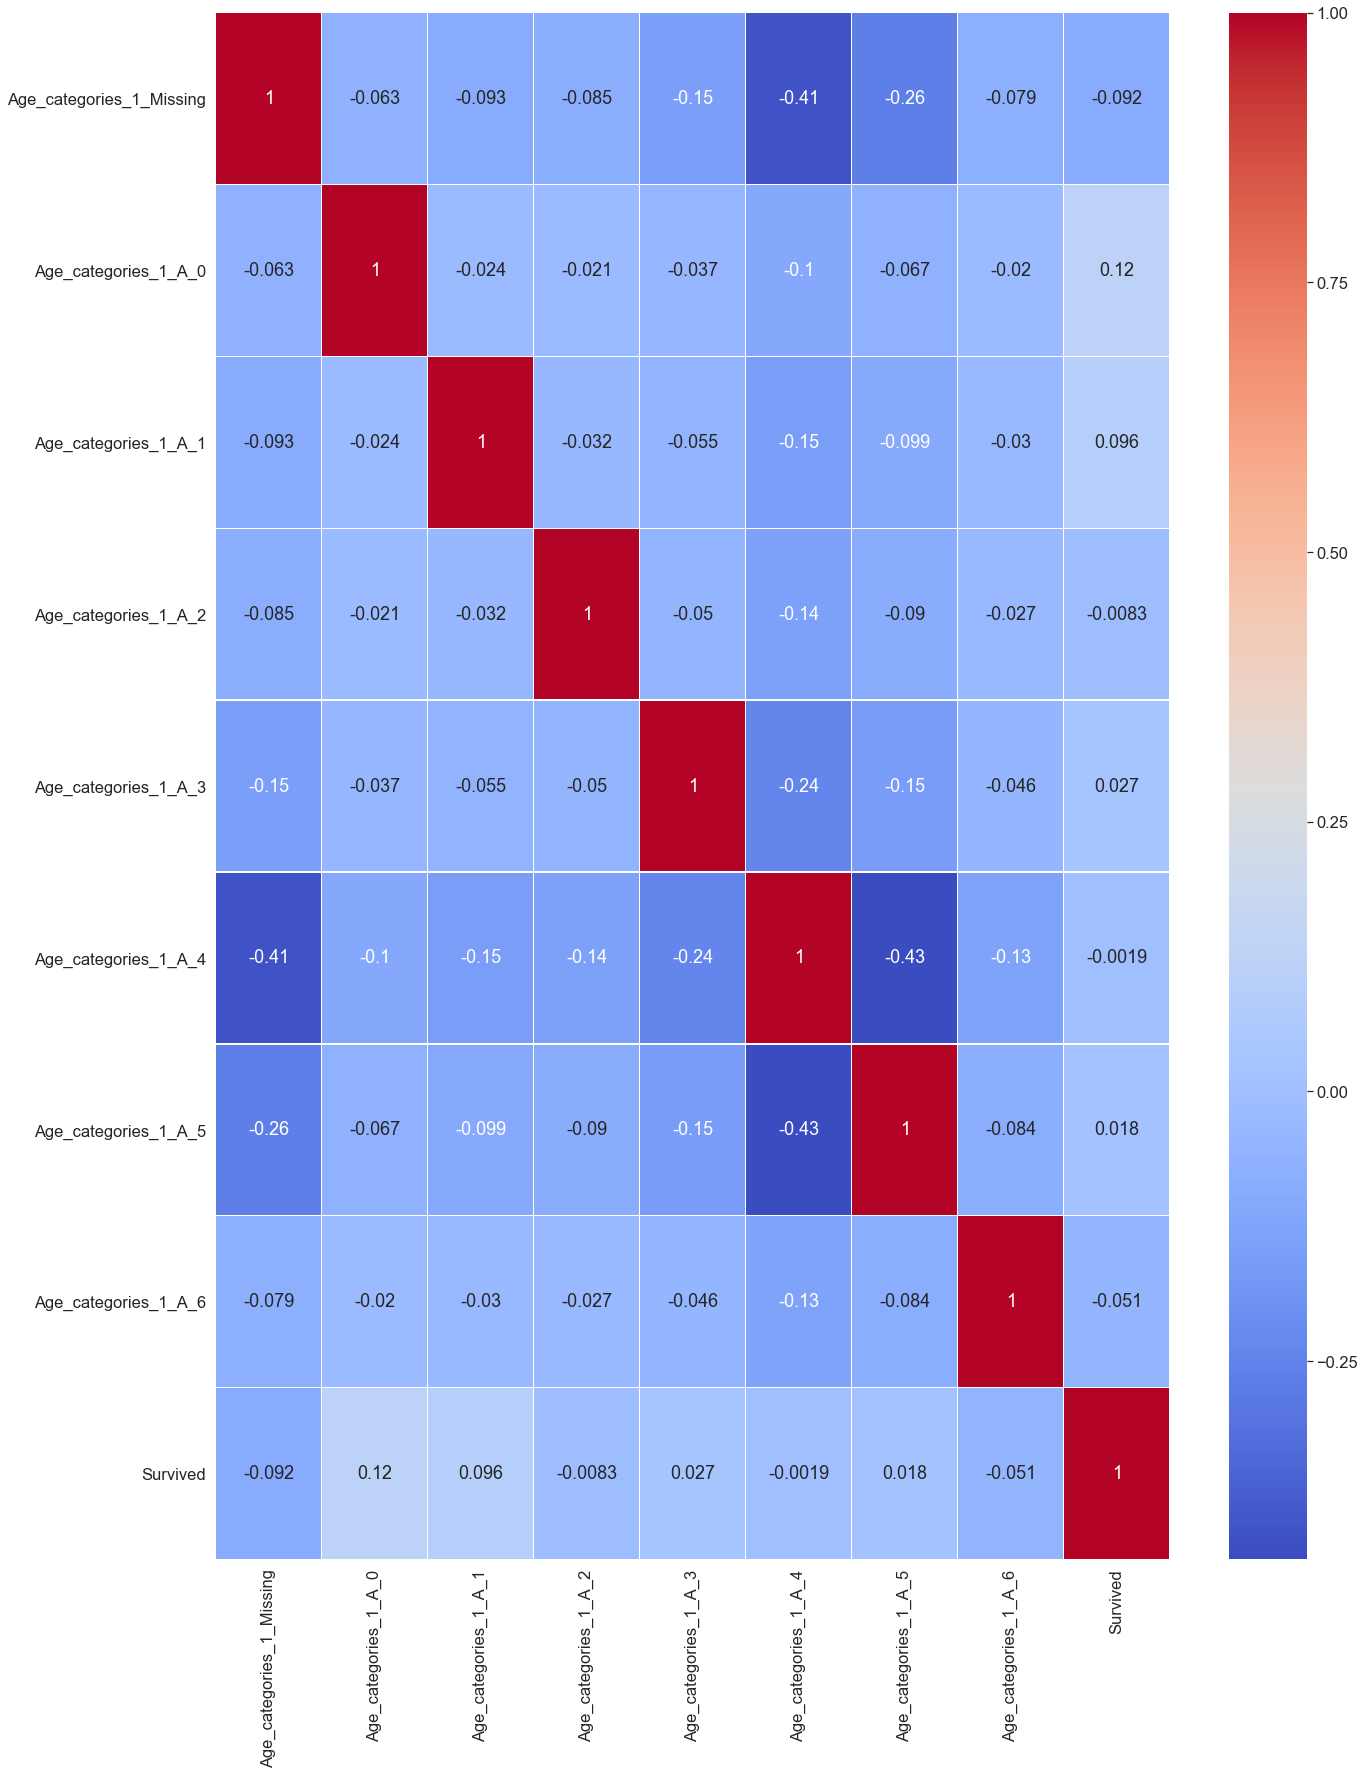

In [54]:
bin_discart('Age_categories_1')

Family_categories
Family_categories_F_0
Family_categories_F_1
Family_categories_F_2
Family_categories_F_3
Family_categories_F_4
Family_categories_F_5
Family_categories_F_6
Family_categories_F_7+
Survived


Survived                  1.000000
Family_categories_F_0     0.203367
Family_categories_F_1     0.163157
Family_categories_F_2     0.143869
Family_categories_F_3     0.128347
Family_categories_F_7+    0.096040
Family_categories_F_5     0.080968
Family_categories_F_4     0.049466
Family_categories_F_6     0.012134
Name: Survived, dtype: float64

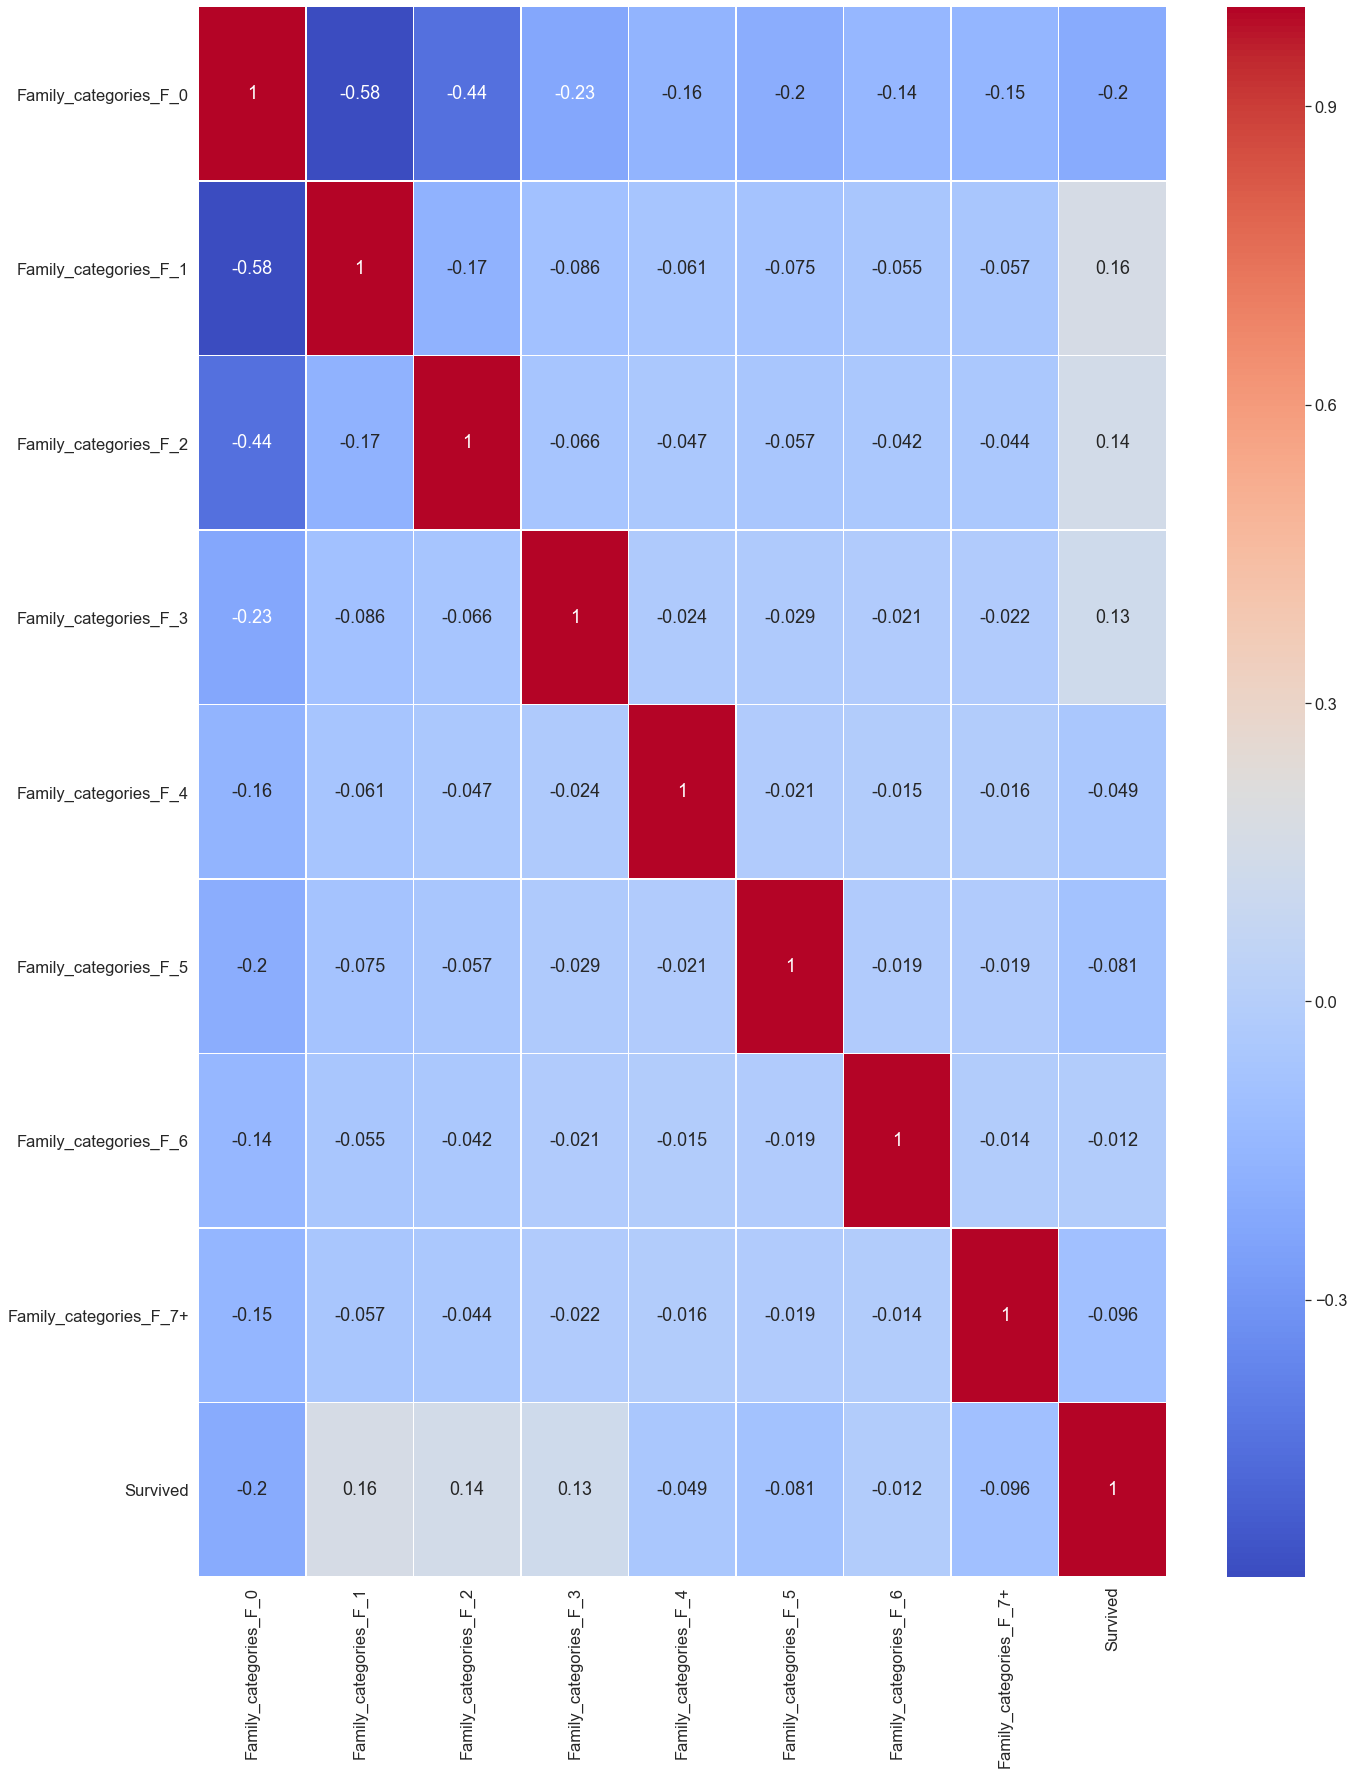

In [55]:
bin_discart('Family_categories')

Fare_categories_1
Fare_categories_1_0-12
Fare_categories_1_12-50
Fare_categories_1_50-100
Fare_categories_1_100+
Survived


Survived                    1.000000
Fare_categories_1_0-12      0.267244
Fare_categories_1_50-100    0.205384
Fare_categories_1_100+      0.182033
Fare_categories_1_12-50     0.065790
Name: Survived, dtype: float64

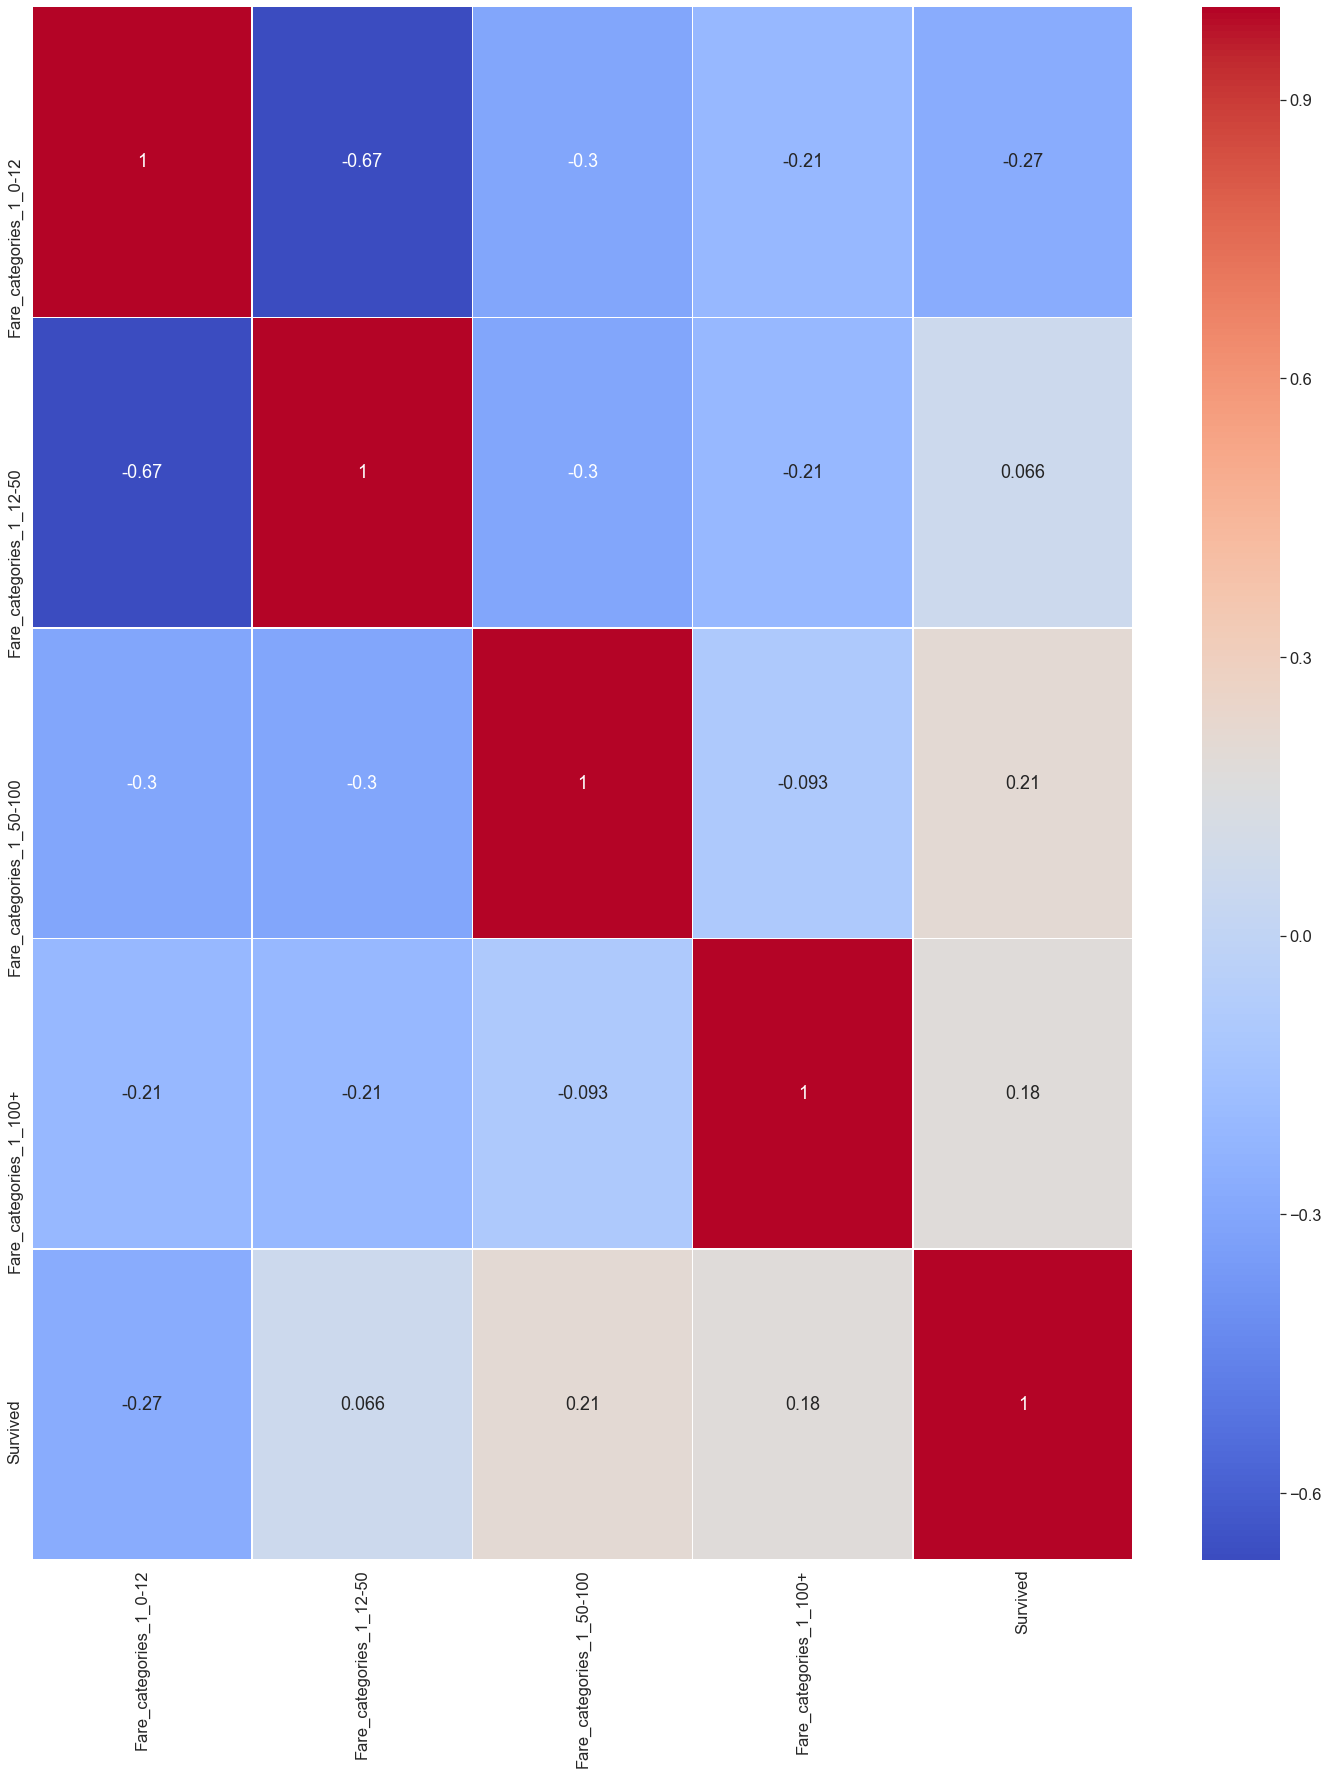

In [56]:
bin_discart('Fare_categories_1')

Embarked
Embarked_C
Embarked_Q
Embarked_S
Survived


Survived      1.000000
Embarked_C    0.168240
Embarked_S    0.149683
Embarked_Q    0.003650
Name: Survived, dtype: float64

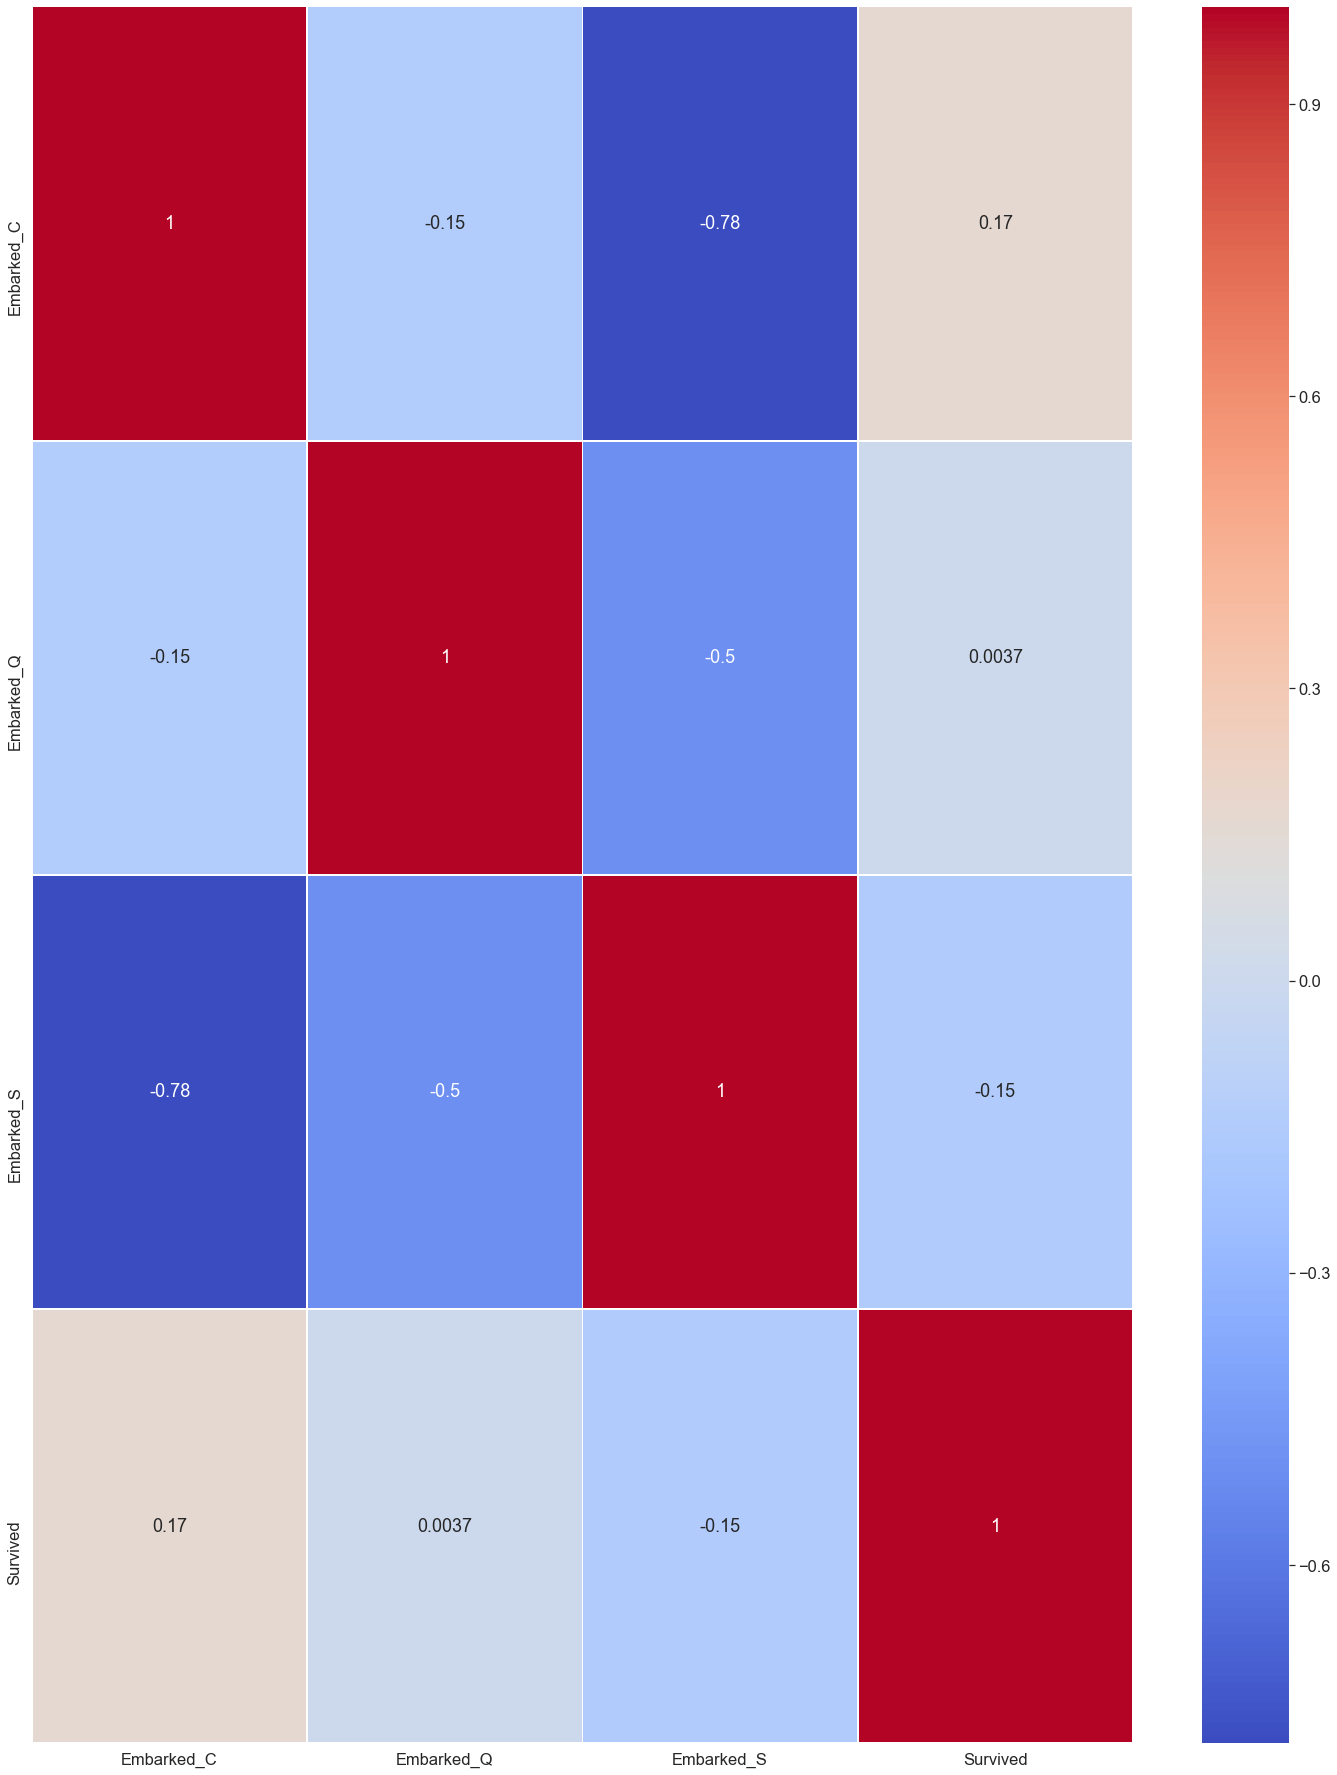

In [57]:
bin_discart('Embarked')

Deck
Deck_A
Deck_B
Deck_C
Deck_D
Deck_E
Deck_F
Deck_G
Deck_T
Deck_U
Survived


Survived    1.000000
Deck_U      0.316912
Deck_B      0.175095
Deck_D      0.150716
Deck_E      0.145321
Deck_C      0.114652
Deck_F      0.057935
Deck_T      0.026456
Deck_A      0.022287
Deck_G      0.016040
Name: Survived, dtype: float64

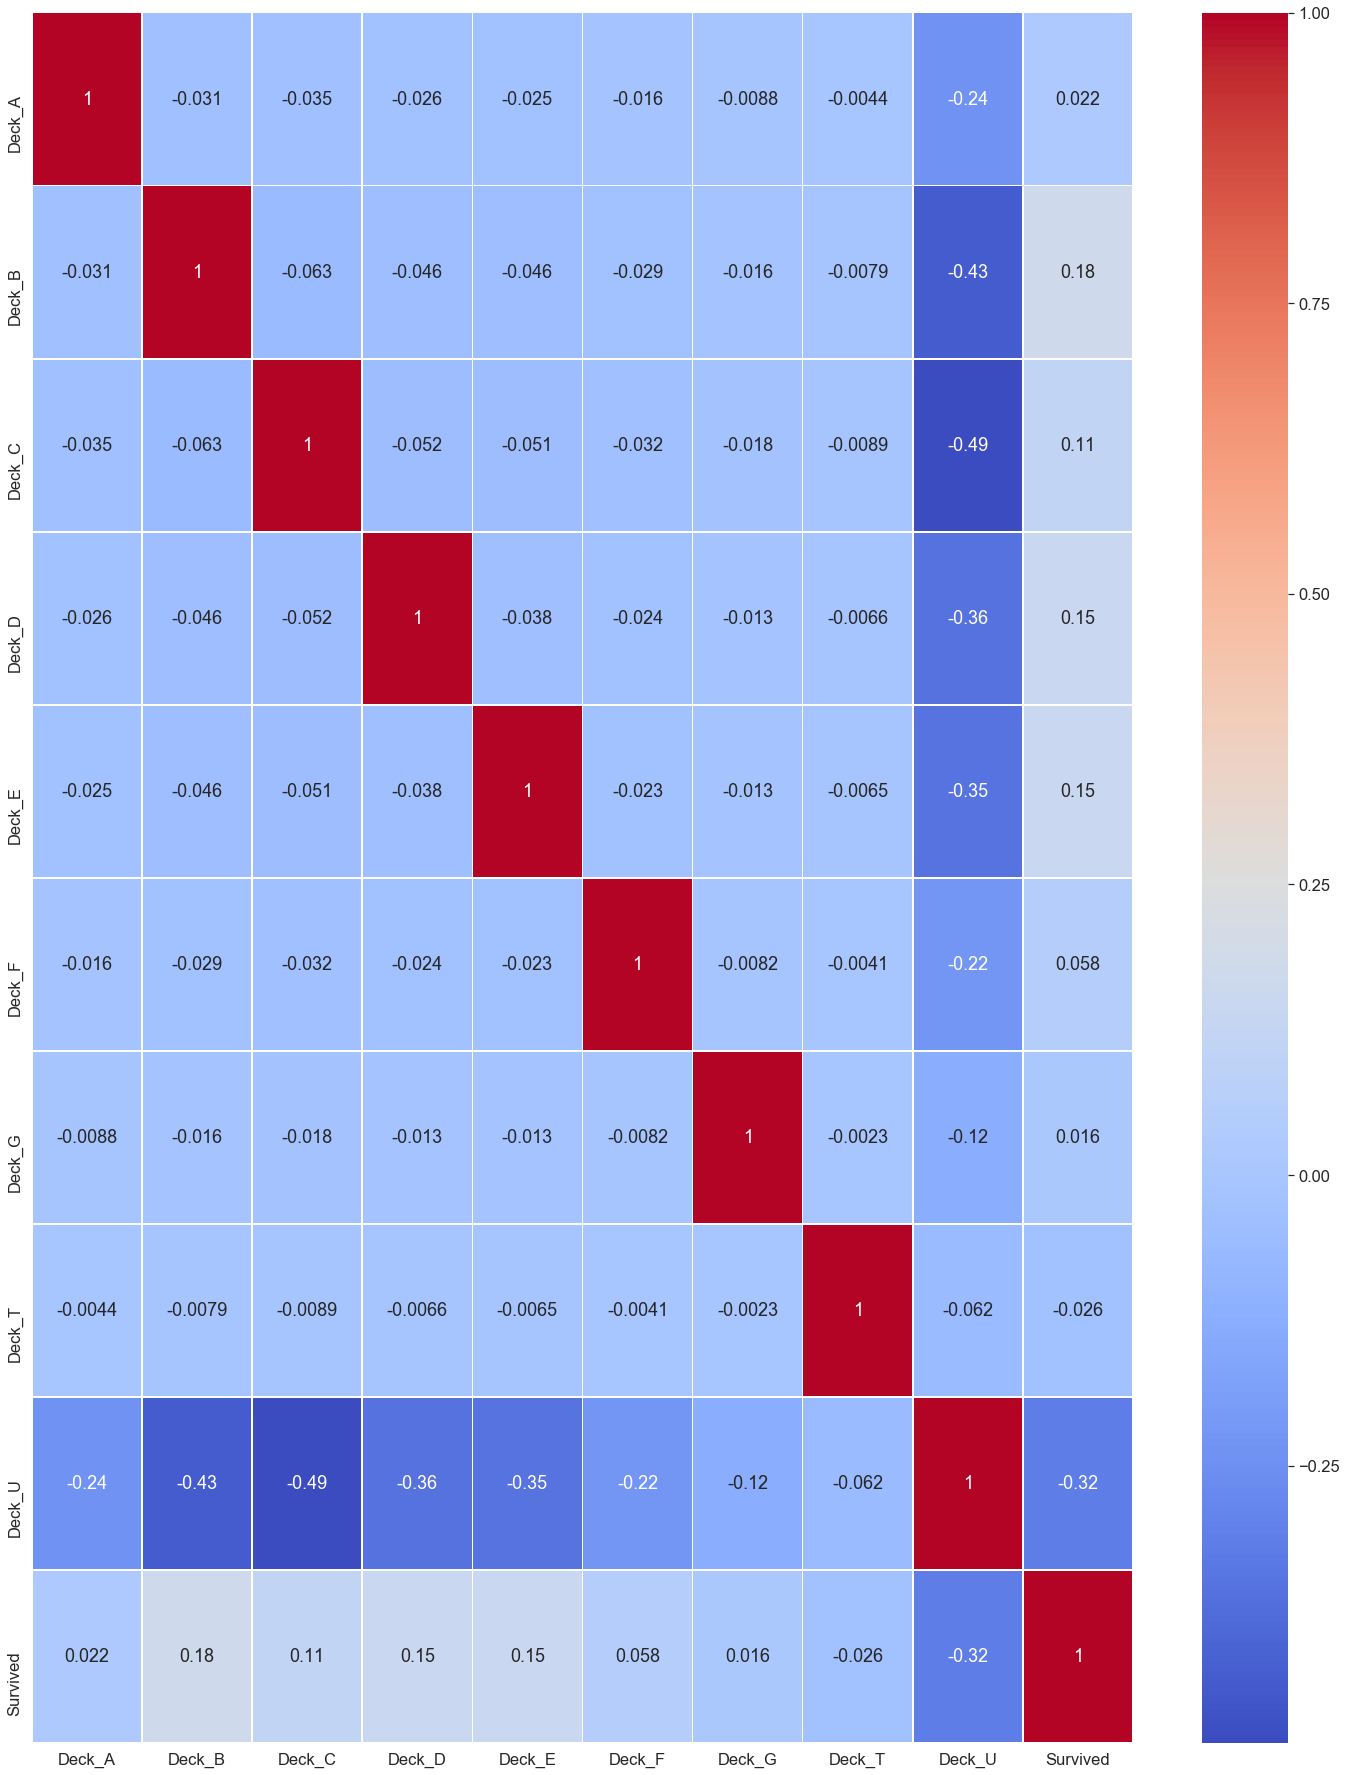

In [58]:
bin_discart('Deck')

In [59]:
'''
Drops at least one bin from each classification

Sex_female
Age_categories_1_A_4                 
Pclass_Title_2_3 - Master_Royalty
Embarked_Q                                                     
Age_categories_1_A_2                 
Family_categories_F_6                
Deck_G                               
Age_categories_1_A_5                 
Deck_A                               
Pclass_Title_2_1 - Officer 
Deck_T                               
Age_categories_1_A_3                 
Pclass_Title_2_1 - Mr
Family_categories_F_4                
Age_categories_1_A_6                 
Deck_F                               
Fare_categories_1_12-50  
Pclass_Title_2_1 - Master_Royalty
Pclass_Title_2_2 - Officer
Family_categories_F_5
Age_categories_1_Missing 
Age_categories_1_A_1
Family_categories_F_7+
Pclass_Title_2_3 - Mrs_Miss
Pclass_Title_2_2 - Master_Royalty 
Embarked_S    
'''
train_Variables_1 = train.drop(['PassengerId', 'Sex_female'
                                ,'Age_categories_1_A_4'                 
                                ,'Pclass_Title_2_3 - Master_Royalty'
                                ,'Embarked_Q'                                                     
                                ,'Age_categories_1_A_2'                 
                                ,'Family_categories_F_6'                
                                ,'Deck_G'                               
                                ,'Age_categories_1_A_5'                 
                                ,'Deck_A'                               
                                ,'Pclass_Title_2_1 - Officer' 
                                ,'Deck_T'                               
                                ,'Age_categories_1_A_3'                 
                                ,'Pclass_Title_2_1 - Mr'
                                ,'Family_categories_F_4'                
                                ,'Age_categories_1_A_6'                 
                                ,'Deck_F'                               
                                ,'Fare_categories_1_12-50'  
                                ,'Pclass_Title_2_1 - Master_Royalty'
                                ,'Pclass_Title_2_2 - Officer'
                                ,'Family_categories_F_5'
                                ,'Age_categories_1_Missing' 
                                ,'Age_categories_1_A_1'
                                ,'Family_categories_F_7+'
                                ,'Pclass_Title_2_3 - Mrs_Miss'
                                ,'Pclass_Title_2_2 - Master_Royalty'
                                , 'Embarked_S']
                        , axis =1)
train_Variables_1.head()

,Survived,Sex,Pclass_Title_2,Age_categories_1,Deck,Family_categories,Fare_categories_1,Embarked,Sex_male,Pclass_Title_2_1 - Mrs_Miss,Pclass_Title_2_2 - Mr,Pclass_Title_2_2 - Mrs_Miss,Pclass_Title_2_3 - Mr,Age_categories_1_A_0,Deck_B,Deck_C,Deck_D,Deck_E,Deck_U,Family_categories_F_0,Family_categories_F_1,Family_categories_F_2,Family_categories_F_3,Fare_categories_1_0-12,Fare_categories_1_50-100,Fare_categories_1_100+,Embarked_C
0,0,male,3 - Mr,A_4,U,F_1,0-12,S,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
1,1,female,1 - Mrs_Miss,A_5,C,F_1,50-100,C,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,1,female,3 - Mrs_Miss,A_4,U,F_0,0-12,S,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
3,1,female,1 - Mrs_Miss,A_4,C,F_1,50-100,S,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,0,male,3 - Mr,A_4,U,F_0,0-12,S,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0


Survived                       1.000000
Sex_male                       0.543351
Pclass_Title_2_3 - Mr          0.416123
Pclass_Title_2_1 - Mrs_Miss    0.404453
Pclass_Title_2_2 - Mrs_Miss    0.337329
Deck_U                         0.316912
Fare_categories_1_0-12         0.267244
Fare_categories_1_50-100       0.205384
Pclass_Title_2_2 - Mr          0.205229
Family_categories_F_0          0.203367
Fare_categories_1_100+         0.182033
Deck_B                         0.175095
Embarked_C                     0.168240
Family_categories_F_1          0.163157
Deck_D                         0.150716
Deck_E                         0.145321
Family_categories_F_2          0.143869
Family_categories_F_3          0.128347
Age_categories_1_A_0           0.122966
Deck_C                         0.114652
Name: Survived, dtype: float64

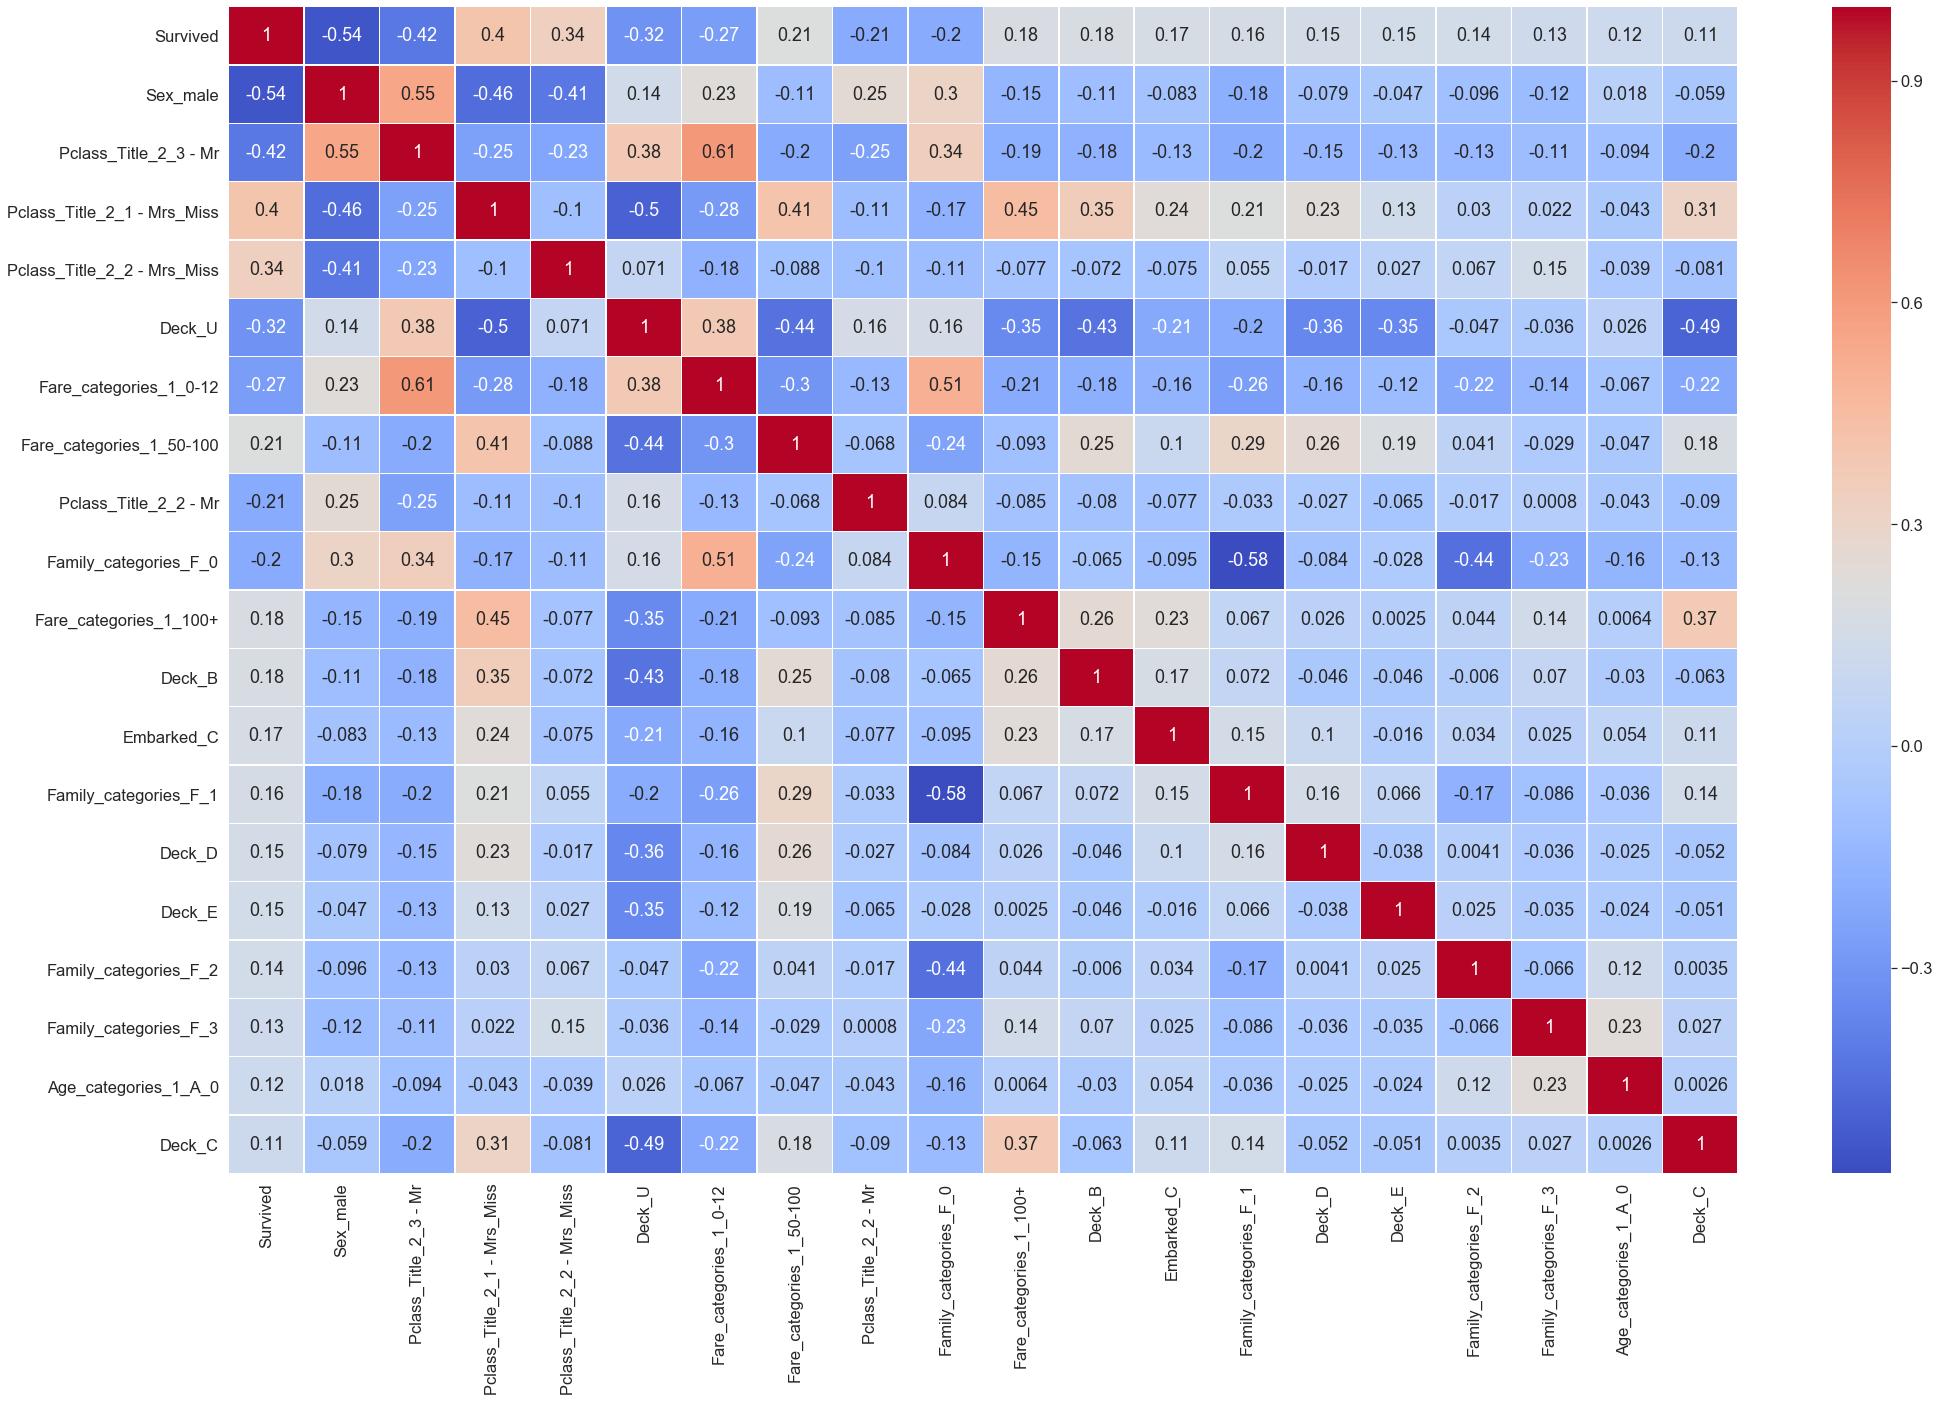

In [60]:
#Verifies correlation.
corrmat = train_Variables_1.corr()
sorted_corrs = corrmat['Survived'].abs().sort_values(ascending = False)
display(sorted_corrs)
#Heatmap
corrmat = train_Variables_1[sorted_corrs.index].corr()
plt.figure(figsize=(30,20))

ax = sns.heatmap(corrmat, annot = True, linewidth = 0.5, cmap='coolwarm')
sns.set(font_scale = 2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.savefig('heatmap_all_variables.png')
plt.show()

In [61]:
train_Variables_1.columns

Index(['Survived', 'Sex', 'Pclass_Title_2', 'Age_categories_1', 'Deck',
       'Family_categories', 'Fare_categories_1', 'Embarked', 'Sex_male',
       'Pclass_Title_2_1 - Mrs_Miss', 'Pclass_Title_2_2 - Mr',
       'Pclass_Title_2_2 - Mrs_Miss', 'Pclass_Title_2_3 - Mr',
       'Age_categories_1_A_0', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_U', 'Family_categories_F_0', 'Family_categories_F_1',
       'Family_categories_F_2', 'Family_categories_F_3',
       'Fare_categories_1_0-12', 'Fare_categories_1_50-100',
       'Fare_categories_1_100+', 'Embarked_C'],
      dtype='object')

In [62]:
'''
Drop old variables:
Sex
Pclass_Title_2
Age_categories_Deck
Family_categories
Fare_categories_1
Embarked
'''
train_Variables_Model = train_Variables_1.drop(['Sex', 'Pclass_Title_2', 'Age_categories_1', 'Deck'
                            ,'Family_categories', 'Fare_categories_1', 'Embarked'], axis =1)

In [63]:
#Defines the variables used for modeling.
columns_models = train_Variables_Model.columns
columns_models = columns_models.drop('Survived')
print(*columns_models, sep = '\n')
print("Number of variables used: ", len(columns_models))

Sex_male
Pclass_Title_2_1 - Mrs_Miss
Pclass_Title_2_2 - Mr
Pclass_Title_2_2 - Mrs_Miss
Pclass_Title_2_3 - Mr
Age_categories_1_A_0
Deck_B
Deck_C
Deck_D
Deck_E
Deck_U
Family_categories_F_0
Family_categories_F_1
Family_categories_F_2
Family_categories_F_3
Fare_categories_1_0-12
Fare_categories_1_50-100
Fare_categories_1_100+
Embarked_C
Number of variables used:  19


In [64]:
#Modeling
def select_model(df,features):
    
    all_X = df[features]
    all_y = df["Survived"]

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(random_state = 0),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"],
                    "fit_intercept": [True, False],
                    "class_weight":["balanced", None, {0:2, 1:3}, {0:1, 1:3}]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "DecisionTreeRegressor",
            "estimator": DecisionTreeRegressor(random_state=1),
            "hyperparameters":
                {
                    "criterion": ["mse", "friedman_mse", "mae"],
                    "splitter": ["best", "random"],
                    "max_depth": [7, 9, 10, 15, 20, None],
                    "max_features": ["log2", "sqrt", None]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(n_estimators = 300, random_state=1),
            "hyperparameters":
                {
                    "criterion": ["entropy", "gini"],
                    "max_depth": [10, 15, 20],
                    "max_features": ["log2", "sqrt"]
                }
        },
        {
            "name": "MLPClassifier",
            "estimator": MLPClassifier(alpha = 0.0001, max_iter = 10000, random_state = 1),
            "hyperparameters":
                {
                    "hidden_layer_sizes": [(100,), (19,), (19,1), (19,2), (19,3)],
                    "activation": ["relu", "logistic"],   
                    "solver": ['adam', 'lbfgs'],
                    "learning_rate":  ["constant", "invscaling", "adaptive"]
                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(train_Variables_Model, columns_models)

LogisticRegression
------------------
Best Score: 0.8114478114478114
Best Parameters: {'class_weight': {0: 2, 1: 3}, 'fit_intercept': True, 'solver': 'newton-cg'}

KNeighborsClassifier
--------------------


C:\Users\maxwi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score: 0.8372615039281706
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}

DecisionTreeRegressor
---------------------


C:\Users\maxwi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score: 0.4176473386328487
Best Parameters: {'criterion': 'mse', 'max_depth': 7, 'max_features': None, 'splitter': 'best'}

RandomForestClassifier
----------------------
Best Score: 0.835016835016835
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}

MLPClassifier
-------------


C:\Users\maxwi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score: 0.8338945005611672
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (19,), 'learning_rate': 'constant', 'solver': 'lbfgs'}



scores:  [0.77777778 0.76666667 0.78651685 0.85393258 0.79775281 0.7752809
 0.83146067 0.82022472 0.87640449 0.82954545]
accuracy:  0.8115562932697763

Sex_male                      -1.171070
Pclass_Title_2_1 - Mrs_Miss    2.388360
Pclass_Title_2_2 - Mr         -1.402608
Pclass_Title_2_2 - Mrs_Miss    2.081764
Pclass_Title_2_3 - Mr         -1.148280
Age_categories_1_A_0           2.046924
Deck_B                         0.033158
Deck_C                        -0.414983
Deck_D                         0.413135
Deck_E                         0.741437
Deck_U                        -0.424806
Family_categories_F_0          1.599897
Family_categories_F_1          1.368327
Family_categories_F_2          1.953118
Family_categories_F_3          1.734557
Fare_categories_1_0-12         0.040903
Fare_categories_1_50-100       0.442301
Fare_categories_1_100+         0.022035
Embarked_C                     0.410857
dtype: float64


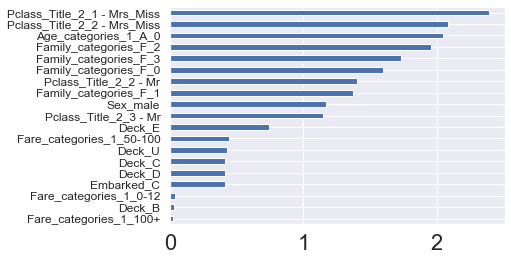

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [65]:
#Logit
model_1 = LogisticRegression(class_weight = {0: 2, 1: 3}, fit_intercept = True, solver = 'newton-cg', random_state = 0)
model_1.fit(train_Variables_Model[columns_models], train_Variables_Model['Survived'])

scores_1 = cross_val_score(model_1, train_Variables_Model[columns_models], train_Variables_Model['Survived'], cv = 10)
accuracy_1 = scores_1.mean()
print('scores: ', scores_1)
print('accuracy: ', accuracy_1)
print()

coefficients_1 = model_1.coef_
feature_importance_1 = pd.Series(coefficients_1[0], index = train_Variables_Model[columns_models].columns)
print(feature_importance_1)
ordered_feature_importance_1 = feature_importance_1.abs().sort_values()
plt.rc('ytick', labelsize = 12)
ordered_feature_importance_1.plot.barh()
plt.show()

holdout_predictions = model_1.predict(holdout[columns_models])

holdout_ids = holdout["PassengerId"]
submission_logit_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission_logit = pd.DataFrame(submission_logit_df)

submission_logit.to_csv("submission_logit.csv",index=False)
submission_logit.head()

#Score Kaggle: 0.75119 

In [66]:
#Use selector to choose which variables to use.
train_Variables_Model_2 = train.drop(['PassengerId', 'Sex', 'Pclass_Title_2', 'Age_categories_1', 'Deck'
                            ,'Family_categories', 'Fare_categories_1', 'Embarked'], axis =1)
columns_models_2 = train_Variables_Model_2.columns
columns_models_2 = columns_models_2.drop('Survived')

lr = LogisticRegression(class_weight = {0: 2, 1: 3}, fit_intercept = True, solver = 'newton-cg', random_state = 0)
selector = RFECV(lr, cv=10)
selector.fit(train_Variables_Model_2[columns_models_2], train_Variables_Model_2['Survived'])

optimized_columns = train_Variables_Model_2[columns_models_2].columns[selector.support_]

print(*optimized_columns, sep = '\n')
print("Number of variables used: ", len(optimized_columns))

Sex_female
Sex_male
Pclass_Title_2_1 - Master_Royalty
Pclass_Title_2_1 - Mr
Pclass_Title_2_1 - Mrs_Miss
Pclass_Title_2_2 - Master_Royalty
Pclass_Title_2_2 - Mr
Pclass_Title_2_2 - Mrs_Miss
Pclass_Title_2_2 - Officer
Pclass_Title_2_3 - Master_Royalty
Pclass_Title_2_3 - Mr
Pclass_Title_2_3 - Mrs_Miss
Age_categories_1_Missing
Age_categories_1_A_0
Age_categories_1_A_1
Age_categories_1_A_2
Age_categories_1_A_4
Age_categories_1_A_5
Age_categories_1_A_6
Deck_A
Deck_B
Deck_D
Deck_E
Deck_F
Deck_G
Deck_T
Deck_U
Family_categories_F_0
Family_categories_F_1
Family_categories_F_2
Family_categories_F_3
Family_categories_F_4
Family_categories_F_5
Family_categories_F_6
Family_categories_F_7+
Fare_categories_1_12-50
Fare_categories_1_50-100
Fare_categories_1_100+
Embarked_S
Number of variables used:  39


In [67]:
model_1_2 = LogisticRegression(class_weight = {0: 2, 1: 3}, fit_intercept = True, solver = 'newton-cg', random_state = 0)
model_1_2.fit(train_Variables_Model_2[optimized_columns], train_Variables_Model_2['Survived'])

scores_1_2 = cross_val_score(model_1_2, train_Variables_Model_2[optimized_columns], train_Variables_Model_2['Survived'], cv = 10)
accuracy_1_2 = scores_1_2.mean()
print('scores: ', scores_1_2)
print('accuracy: ', accuracy_1_2)
print()

scores:  [0.78888889 0.81111111 0.78651685 0.86516854 0.80898876 0.7752809
 0.84269663 0.80898876 0.85393258 0.85227273]
accuracy:  0.8193845760980591



Selector does not improve our model significantly. Moreover, there is a high correlation between the variables choose by the selector.

In [68]:
#KNeighborsClassifier
#Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}
model_2= KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 17, p = 1, weights = 'distance')
model_2.fit(train_Variables_Model[columns_models], train_Variables_Model['Survived'])


holdout_predictions = model_2.predict(holdout[columns_models])

holdout_ids = holdout["PassengerId"]
submission_knc_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission_knc = pd.DataFrame(submission_knc_df)

submission_knc.to_csv("submission_knc.csv",index=False)
submission_knc.head()

#Score: 0.78947 

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [69]:
#DecisionTreeRegressor
#Best Parameters: {'criterion': 'mse', 'max_depth': 7, 'max_features': None, 'splitter': 'best'}
model_3 = DecisionTreeRegressor(criterion = 'mse', max_depth = 7, max_features = None, 
                                splitter = 'best', random_state = 1)
model_3.fit(train_Variables_Model[columns_models], train_Variables_Model['Survived'])

predictions_3 = model_3.predict(holdout[columns_models])

holdout_predictions = []
for i in range(len(predictions_3)):
    if predictions_3[i] < 0.5:
        holdout_predictions.append(0)
    else:
        holdout_predictions.append(1)


holdout_ids = holdout["PassengerId"]
submission_tree_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission_tree = pd.DataFrame(submission_tree_df)

submission_tree.to_csv("submission_tree.csv",index=False)
submission_tree.head()

#Score: 0.76076 

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [70]:
#RandomForestClassifier
#Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}
model_4 = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'log2', 
                                 n_estimators = 300, random_state = 1)
model_4.fit(train_Variables_Model[columns_models], train_Variables_Model['Survived'])

holdout_predictions = model_4.predict(holdout[columns_models])


holdout_ids = holdout["PassengerId"]
submission_rfc_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission_rfc = pd.DataFrame(submission_rfc_df)

submission_rfc.to_csv("submission_rfc.csv",index=False)
submission_rfc.head()

#Score: 0.77511

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [71]:
#MLPClassifier
#Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (19,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
model_5 = MLPClassifier(max_iter = 10000, random_state = 1, activation = 'relu', alpha = 0.0001, 
                        hidden_layer_sizes = (19,), learning_rate = 'constant', solver = 'lbfgs')
model_5.fit(train_Variables_Model[columns_models], train_Variables_Model['Survived'])

holdout_predictions = model_5.predict(holdout[columns_models])


holdout_ids = holdout["PassengerId"]
submission_MLP_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission_MLP = pd.DataFrame(submission_MLP_df)

submission_MLP.to_csv("submission_MLP.csv",index=False)
submission_MLP.head()

#Score: 0.77511

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
